In [4]:
import pandas as pd

In [5]:
df=pd.read_excel('./data/Consolidated Sales.xlsx', sheet_name='Main')

In [220]:
df.head(1)

,Material,Billing Doc.,Item,SALES OFFICE CODE,EXT MAT GROUP,MatGroup3,Star Rating,Segment,Star Rating.1,Stor. Location,Sales district,SBU,Year,Month,Week,Billing Date,Customer,Material.1,Billing Quantity ODU,Billing Quantity IDU,Tonnage,Dealer Name,Segment.1,Basic Value,Deal Cat1,USD Value,Deal Cat2,Tax Amount,Price Group,BDC Discount,EDC Discount,Sale Supp Discount,Trade Discount,ZDSD Discount,Fest Discount,ZDIN Spl Discount,SLC/DC/Mat,Mat/DC/SO,Mat/DC,ZDI8-SOrg/Cust,ZDI9-SOrg/RegMarket,RR Discount,Sol Plaza Discount,Turn Over,Sales Commission,Cash Discount,Add Cash Discount,Sales Order,Order Date,Sord Created by,Dealer Code,PayTerm,PersonRes,Order Type,YourRef,Distribution Channel Billing,Sold-to party,Discount,CustCity,Turn Over-CD,Ord Reason,Approval Number,SSS Discount,GR Total,Cust Grp,Plant,Location,Location State,Plant Zone,Sales Group,Division,Qt No.,Qt Type,Qt Date,MAT_GP7,SH CITY,SH POCODE,SH STATE,State Zone,Sales Person Name,Deal/Cust,Application Name,Billing,Inter/Intra,Period
0,FTL28TV16X2,1.933500e+09,230.0,MAA,RA-IDU,RA,N3S,Non Inv,3 Star,1010,NaN,RA,19-20,12) Mar,Wk 4,2020-03-30,CLOUDTAIL INDIA PRIVATE LIMITED,FTL28TV16X2,0.0,-1.0,0.0,CLOUDTAIL INDIA PRIVATE LIMITED,Dealer Billing,-7343.75,ES,$0.0,HA,-1596.96,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5703.42,0.0,0.0,0.0,60235687.0,2020-03-30 00:00:00,S4/Hana,4042,Payable within 21 days,Ashok Kumar NC,ZRET,NaN,ES,200289.0,1640.33,DELHI,-5703.42,113,SALES RETURN,0.0,-7300.38,-,MAAE,Chennai,Tamilnadu,South,AKC,MA,1933024135,-,-,-,CHENNAI.,602107,Tamilnadu,South,Ashok Kumar NC,4042,-,Branch Billing,Intrastate,Season


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324727 entries, 0 to 324726
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Material                      324726 non-null  object        
 1   Billing Doc.                  301123 non-null  float64       
 2   Item                          301123 non-null  float64       
 3   SALES OFFICE CODE             324726 non-null  object        
 4   EXT MAT GROUP                 324726 non-null  object        
 5   MatGroup3                     324726 non-null  object        
 6   Star Rating                   324726 non-null  object        
 7   Segment                       324726 non-null  object        
 8   Star Rating.1                 324726 non-null  object        
 9   Stor. Location                301090 non-null  object        
 10  Sales district                6412 non-null    object        
 11  SBU          

In [222]:
df.shape

(324727, 85)

In [223]:
cols = ['Star Rating.1', 
        'Year', 
        'Month', 
        'Week', 
        'Billing Date', 
        'Billing Quantity ODU', 
        'Billing Quantity IDU', 
        'Tonnage',
        'Location',
        ]
df_subset = df
df_subset = df_subset[(df_subset['Billing Quantity ODU'] >= 0) & (df_subset['Billing Quantity IDU'] >= 0) & (df_subset['State Zone'] == 'South')].reset_index(drop=True)
df_subset = df_subset[cols]

In [224]:
df_subset.head()

,Star Rating.1,Year,Month,Week,Billing Date,Billing Quantity ODU,Billing Quantity IDU,Tonnage,Location
0,5 Star,19-20,12) Mar,Wk 4,2020-03-23,0.0,2.0,0.0,Cochin
1,5 Star,19-20,12) Mar,Wk 4,2020-03-23,2.0,0.0,1.0,Cochin
2,3 Star,19-20,12) Mar,Wk 4,2020-03-23,0.0,2.0,0.0,Cochin
3,3 Star,19-20,12) Mar,Wk 4,2020-03-23,2.0,0.0,1.0,Cochin
4,3 Star,19-20,12) Mar,Wk 4,2020-03-23,0.0,2.0,0.0,Cochin


In [225]:
# Create a copy for standardization
df_standardized = df_subset.copy()

# 1. Rename Star Rating.1 to Star Rating (remove the .1 suffix)
df_standardized = df_standardized.rename(columns={'Star Rating.1': 'Star Rating'})

# 2. Parse and standardize Year format
def parse_year(year_str):
    """Parse year format like '19-20', '20-21' to proper year"""
    if pd.isna(year_str):
        return None
    
    year_str = str(year_str).strip()
    
    # Handle special case for '24-25 Q1'
    if 'Q1' in year_str:
        return 2024  # Assuming Q1 refers to 2024
    
    # Handle format like '19-20', '20-21'
    if '-' in year_str:
        parts = year_str.split('-')
        if len(parts) == 2:
            first_part = parts[0].strip()
            if len(first_part) == 2:
                # Convert 2-digit year to 4-digit
                year = int('20' + first_part)
                return year
    
    # Try to convert directly if it's already a 4-digit year
    try:
        return int(year_str)
    except:
        return None

df_standardized['YYYY'] = df_standardized['Year'].apply(parse_year)
df_standardized = df_standardized.drop(columns=['Year'])


def parse_month(month_str):
    """Parse month format like '12) Mar', '11) Feb' to numeric 1-12"""
    if pd.isna(month_str):
        return None
    
    month_str = str(month_str).strip()
    
    # Extract number from format like '12) Mar'
    if ')' in month_str:
        number_part = month_str.split(')')[0].strip()
        try:
            return int(number_part)
        except:
            return None
    
    # Try direct conversion
    try:
        return int(month_str)
    except:
        return None

df_standardized['Month'] = df_standardized['Month'].apply(parse_month)


def parse_week(week_str):
    """Parse week format like 'Wk 4', 'Wk 3' to numeric 1-4"""
    if pd.isna(week_str):
        return None
    
    week_str = str(week_str).strip()
    
    # Extract number from format like 'Wk 4'
    if 'Wk' in week_str:
        number_part = week_str.replace('Wk', '').strip()
        try:
            return int(number_part)
        except:
            return None
    
    # Try direct conversion
    try:
        return int(week_str)
    except:
        return None

df_standardized['Week'] = df_standardized['Week'].apply(parse_week)

# 5. Create continuous month and week columns
# Sort by YYYY, Month, Week to ensure proper ordering
df_standardized = df_standardized.sort_values(['YYYY', 'Month', 'Week']).reset_index(drop=True)

# Create continuous month counter (starts from 1 and increments across years)
df_standardized['M_C'] = df_standardized.groupby('YYYY')['Month'].rank(method='dense').astype(int)

# Create continuous week counter (starts from 1 and increments across months)
df_standardized['W_C'] = df_standardized.groupby(['YYYY', 'Month'])['Week'].rank(method='dense').astype(int)

# 6. Create QTY column by combining Billing Quantity ODU + Billing Quantity IDU
df_standardized['QTY'] = df_standardized['Billing Quantity ODU'] + df_standardized['Billing Quantity IDU']

df_standardized['Category'] = df_standardized['Tonnage'].astype(str) + '_' + df_standardized['Location'] + '_' + df_standardized['Star Rating'].astype(str)

# 7. Remove redundant columns
columns_to_remove = ['Billing Quantity ODU', 'Billing Quantity IDU', 'Tonnage', 'Location', 'Star Rating']
df_standardized = df_standardized.drop(columns=columns_to_remove)


In [226]:
key_columns = ['YYYY', 'Month', 'Week', 'Month_Continuous', 'Week_Continuous', 'QTY', 'Category']
for col in key_columns:
    if col in df_standardized.columns:
        missing_count = df_standardized[col].isnull().sum()
        print(f"{col}: {missing_count} missing values")



YYYY: 0 missing values
Month: 0 missing values
Week: 0 missing values
QTY: 0 missing values
Category: 15170 missing values


In [227]:
df_standardized = df_standardized.dropna(subset=['Category'])

In [228]:
start_date = df_standardized['Billing Date'].min()
end_date = df_standardized['Billing Date'].max()
total_sales = df_standardized['QTY'].sum()
print(f"Total number of Sales in from {start_date} to {end_date} is {total_sales:,.2f}")

Total number of Sales in from 2019-04-03 00:00:00 to 2024-03-31 00:00:00 is 2,564,614.50


In [229]:
# Calculate Financial Year to Year QTY Growth (excluding FY 2024-2025)
print("=== Financial Year to Year QTY Growth Analysis ===")

# First, let's see what years we have in the data
print(f"Available years in dataset: {sorted(df_standardized['YYYY'].unique())}")

# Calculate total QTY by year
yearly_qty = df_standardized.groupby('YYYY')['QTY'].sum().sort_index()
print(f"\nTotal QTY by Year:")
for year, qty in yearly_qty.items():
    print(f"  {year}: {qty:,.2f}")

# Separate FY 2024-2025 data (3 available months)
fy_2024_2025_data = df_standardized[df_standardized['YYYY'] == 2024]
fy_2024_2025_total = fy_2024_2025_data['QTY'].sum()
fy_2024_2025_months = sorted(fy_2024_2025_data['Month'].unique())

print(f"\n=== FY 2024-2025 Data (Excluded from Growth Analysis) ===")
print(f"Total QTY for FY 2024-2025 (3 available months): {fy_2024_2025_total:,.2f}")
print(f"Available months in FY 2024-2025: {fy_2024_2025_months}")

# Monthly breakdown for FY 2024-2025
monthly_2024_2025 = fy_2024_2025_data.groupby('Month')['QTY'].sum().sort_index()
print(f"\nMonthly QTY for FY 2024-2025:")
for month, qty in monthly_2024_2025.items():
    month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][month-1]
    print(f"  {month_name} ({month}): {qty:,.2f}")

# Exclude FY 2024-2025 from growth analysis
yearly_qty_excluding_2024 = yearly_qty[yearly_qty.index != 2024]
print(f"\n=== Year-over-Year QTY Growth Rates (Excluding FY 2024-2025) ===")
growth_rates = {}

for i in range(1, len(yearly_qty_excluding_2024)):
    current_year = yearly_qty_excluding_2024.index[i]
    previous_year = yearly_qty_excluding_2024.index[i-1]
    
    current_qty = yearly_qty_excluding_2024.iloc[i]
    previous_qty = yearly_qty_excluding_2024.iloc[i-1]
    
    if previous_qty > 0:
        growth_rate = ((current_qty - previous_qty) / previous_qty) * 100
        growth_rates[f"{previous_year} to {current_year}"] = growth_rate
        print(f"  {previous_year} to {current_year}: {growth_rate:+.2f}%")
    else:
        print(f"  {previous_year} to {current_year}: Cannot calculate (previous year QTY is 0)")

# Calculate average growth rate (excluding any NaN values)
valid_growth_rates = [rate for rate in growth_rates.values() if not pd.isna(rate)]
if valid_growth_rates:
    avg_growth = sum(valid_growth_rates) / len(valid_growth_rates)
    print(f"\nAverage Year-over-Year Growth Rate (Excluding FY 2024-2025): {avg_growth:+.2f}%")
else:
    print(f"\nNo valid growth rates to calculate average")

# Calculate compound annual growth rate (CAGR) from first to last year (excluding 2024)
first_year = yearly_qty_excluding_2024.index[0]
last_year = yearly_qty_excluding_2024.index[-1]
first_qty = yearly_qty_excluding_2024.iloc[0]
last_qty = yearly_qty_excluding_2024.iloc[-1]
years_span = last_year - first_year

if first_qty > 0 and years_span > 0:
    cagr = ((last_qty / first_qty) ** (1 / years_span) - 1) * 100
    print(f"\nCompound Annual Growth Rate (CAGR) from {first_year} to {last_year}: {cagr:+.2f}%")
else:
    print(f"\nCannot calculate CAGR")

print(f"\n=== Summary ===")
print(f"Growth analysis covers {len(yearly_qty_excluding_2024)} years: {first_year} to {last_year}")
print(f"Total QTY for growth analysis: {yearly_qty_excluding_2024.sum():,.2f}")
print(f"Average QTY per year (excluding FY 2024-2025): {yearly_qty_excluding_2024.mean():,.2f}")
print(f"\nFY 2024-2025 Total (3 months): {fy_2024_2025_total:,.2f}")
print(f"Overall Total QTY (all years): {yearly_qty.sum():,.2f}")
print(f"For Fy 2024-2025, QTY yet to be sold: {(yearly_qty_excluding_2024.mean() - fy_2024_2025_total):,.2f}")

=== Financial Year to Year QTY Growth Analysis ===
Available years in dataset: [np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]

Total QTY by Year:
  2019: 443,305.00
  2020: 348,861.00
  2021: 450,994.00
  2022: 544,309.50
  2023: 777,145.00

=== FY 2024-2025 Data (Excluded from Growth Analysis) ===
Total QTY for FY 2024-2025 (3 available months): 0.00
Available months in FY 2024-2025: []

Monthly QTY for FY 2024-2025:

=== Year-over-Year QTY Growth Rates (Excluding FY 2024-2025) ===
  2019 to 2020: -21.30%
  2020 to 2021: +29.28%
  2021 to 2022: +20.69%
  2022 to 2023: +42.78%

Average Year-over-Year Growth Rate (Excluding FY 2024-2025): +17.86%

Compound Annual Growth Rate (CAGR) from 2019 to 2023: +15.07%

=== Summary ===
Growth analysis covers 5 years: 2019 to 2023
Total QTY for growth analysis: 2,564,614.50
Average QTY per year (excluding FY 2024-2025): 512,922.90

FY 2024-2025 Total (3 months): 0.00
Overall Total QTY (all years): 2,564,614.50
For 

In [230]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("=== Creating Comprehensive Charts for Years, Months, Weeks, and QTY ===")
print(f"Data shape: {df_standardized.shape}")
print(f"Date range: {df_standardized['Billing Date'].min()} to {df_standardized['Billing Date'].max()}")
print(f"Total QTY: {df_standardized['QTY'].sum():,.2f}")


=== Creating Comprehensive Charts for Years, Months, Weeks, and QTY ===
Data shape: (293932, 8)
Date range: 2019-04-03 00:00:00 to 2024-03-31 00:00:00
Total QTY: 2,564,614.50



=== 1. Yearly QTY Trend Analysis ===
Yearly QTY Summary:
 Year  Total_QTY  Avg_QTY_per_Record  Record_Count
 2019   443305.0            7.411144         59816
 2020   348861.0            7.776141         44863
 2021   450994.0            8.778301         51376
 2022   544309.5            9.398258         57916
 2023   777145.0            9.719051         79961
 2024   218276.0           14.388662         15170


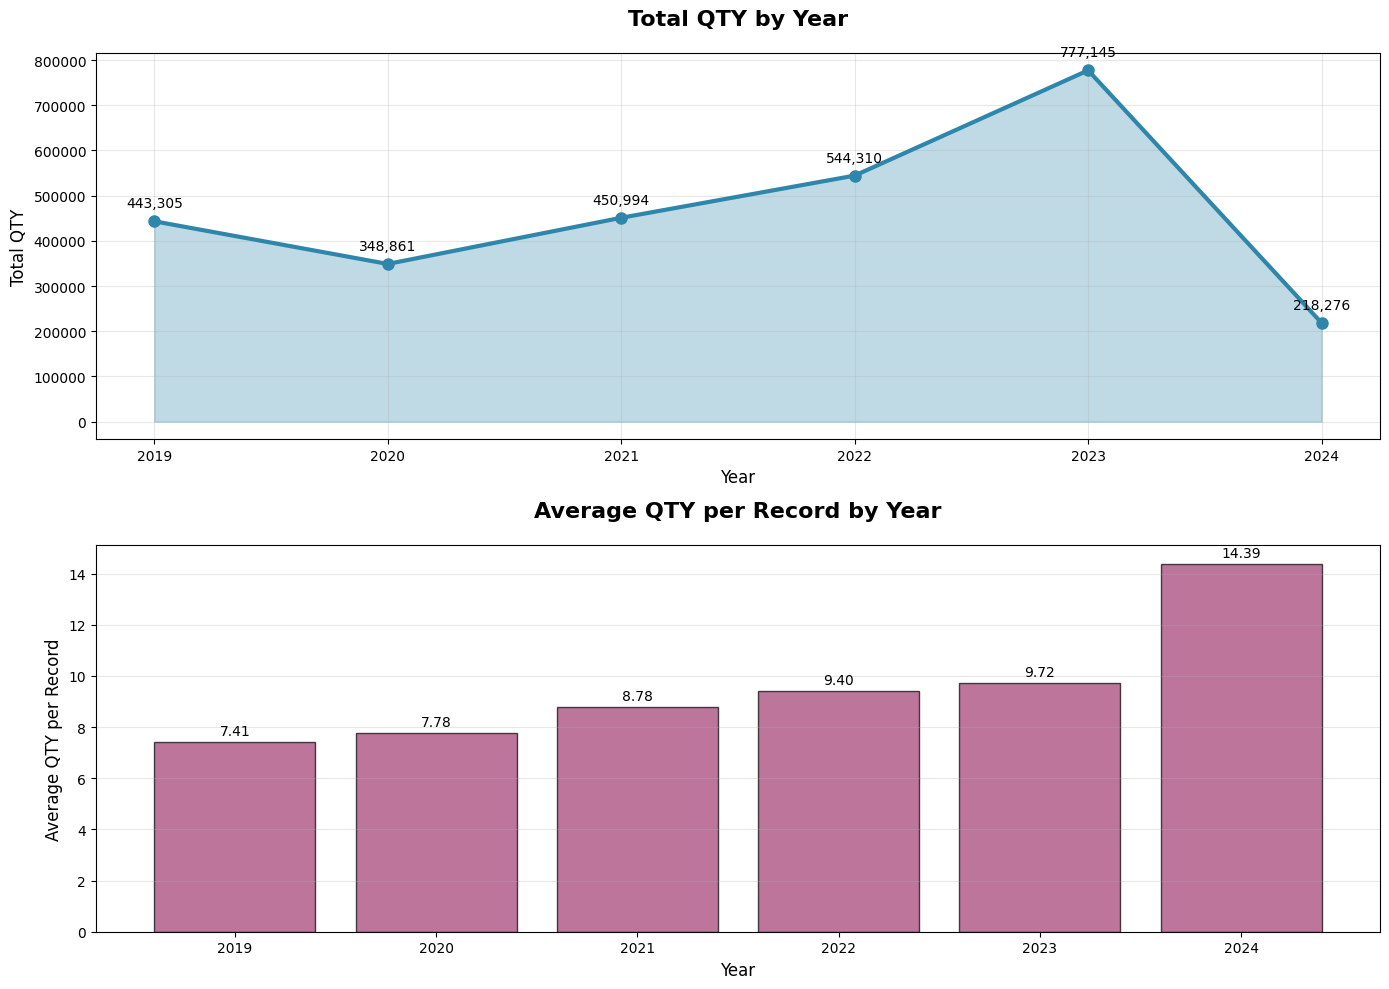

Growth 2019.0 to 2020.0: -21.30%
Growth 2020.0 to 2021.0: +29.28%
Growth 2021.0 to 2022.0: +20.69%
Growth 2022.0 to 2023.0: +42.78%
Growth 2023.0 to 2024.0: -71.91%
Average yearly growth rate: -0.09%


In [37]:
# 1. YEARLY QTY TREND CHART
print("\n=== 1. Yearly QTY Trend Analysis ===")

# Calculate yearly aggregations
yearly_qty = df_standardized.groupby('YYYY')['QTY'].agg(['sum', 'mean', 'count']).reset_index()
yearly_qty.columns = ['Year', 'Total_QTY', 'Avg_QTY_per_Record', 'Record_Count']

print("Yearly QTY Summary:")
print(yearly_qty.to_string(index=False))

# Create yearly trend chart
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Total QTY by Year
ax1.plot(yearly_qty['Year'], yearly_qty['Total_QTY'], marker='o', linewidth=3, markersize=8, color='#2E86AB')
ax1.fill_between(yearly_qty['Year'], yearly_qty['Total_QTY'], alpha=0.3, color='#2E86AB')
ax1.set_title('Total QTY by Year', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total QTY', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.ticklabel_format(style='plain', axis='y')

# Add value labels on points
for i, (year, qty) in enumerate(zip(yearly_qty['Year'], yearly_qty['Total_QTY'])):
    ax1.annotate(f'{qty:,.0f}', (year, qty), textcoords="offset points", xytext=(0,10), ha='center')

# Average QTY per Record by Year
ax2.bar(yearly_qty['Year'], yearly_qty['Avg_QTY_per_Record'], color='#A23B72', alpha=0.7, edgecolor='black')
ax2.set_title('Average QTY per Record by Year', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Average QTY per Record', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (year, avg_qty) in enumerate(zip(yearly_qty['Year'], yearly_qty['Avg_QTY_per_Record'])):
    ax2.annotate(f'{avg_qty:.2f}', (year, avg_qty), textcoords="offset points", xytext=(0,5), ha='center')

plt.tight_layout()
plt.show()

# Calculate year-over-year growth
yearly_growth = []
for i in range(1, len(yearly_qty)):
    current_qty = yearly_qty.iloc[i]['Total_QTY']
    previous_qty = yearly_qty.iloc[i-1]['Total_QTY']
    growth_rate = ((current_qty - previous_qty) / previous_qty) * 100
    yearly_growth.append(growth_rate)
    print(f"Growth {yearly_qty.iloc[i-1]['Year']} to {yearly_qty.iloc[i]['Year']}: {growth_rate:+.2f}%")

print(f"Average yearly growth rate: {np.mean(yearly_growth):+.2f}%")



=== 2. Monthly QTY Pattern Analysis ===
Monthly QTY Summary:
Month_Name  Total_QTY  Avg_QTY_per_Record  Record_Count
       Jan   444007.0           11.064216         40130
       Feb   278421.0            9.704800         28689
       Mar   161681.0            7.266888         22249
       Apr    97246.0            6.079395         15996
       May   120499.0            5.813625         20727
       Jun   157841.0            6.608650         23884
       Jul   132102.0            6.460071         20449
       Aug   123250.0            6.411924         19222
       Sep   368459.5           11.734005         31401
       Oct   189034.0           10.603208         17828
       Nov   332183.0           10.555210         31471
       Dec   378167.0           10.205284         37056


/var/folders/vg/pxkxmzld5s73d47lq0mx8hyr0000gn/T/ipykernel_66320/111092109.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot(monthly_data_for_box, labels=monthly_labels)


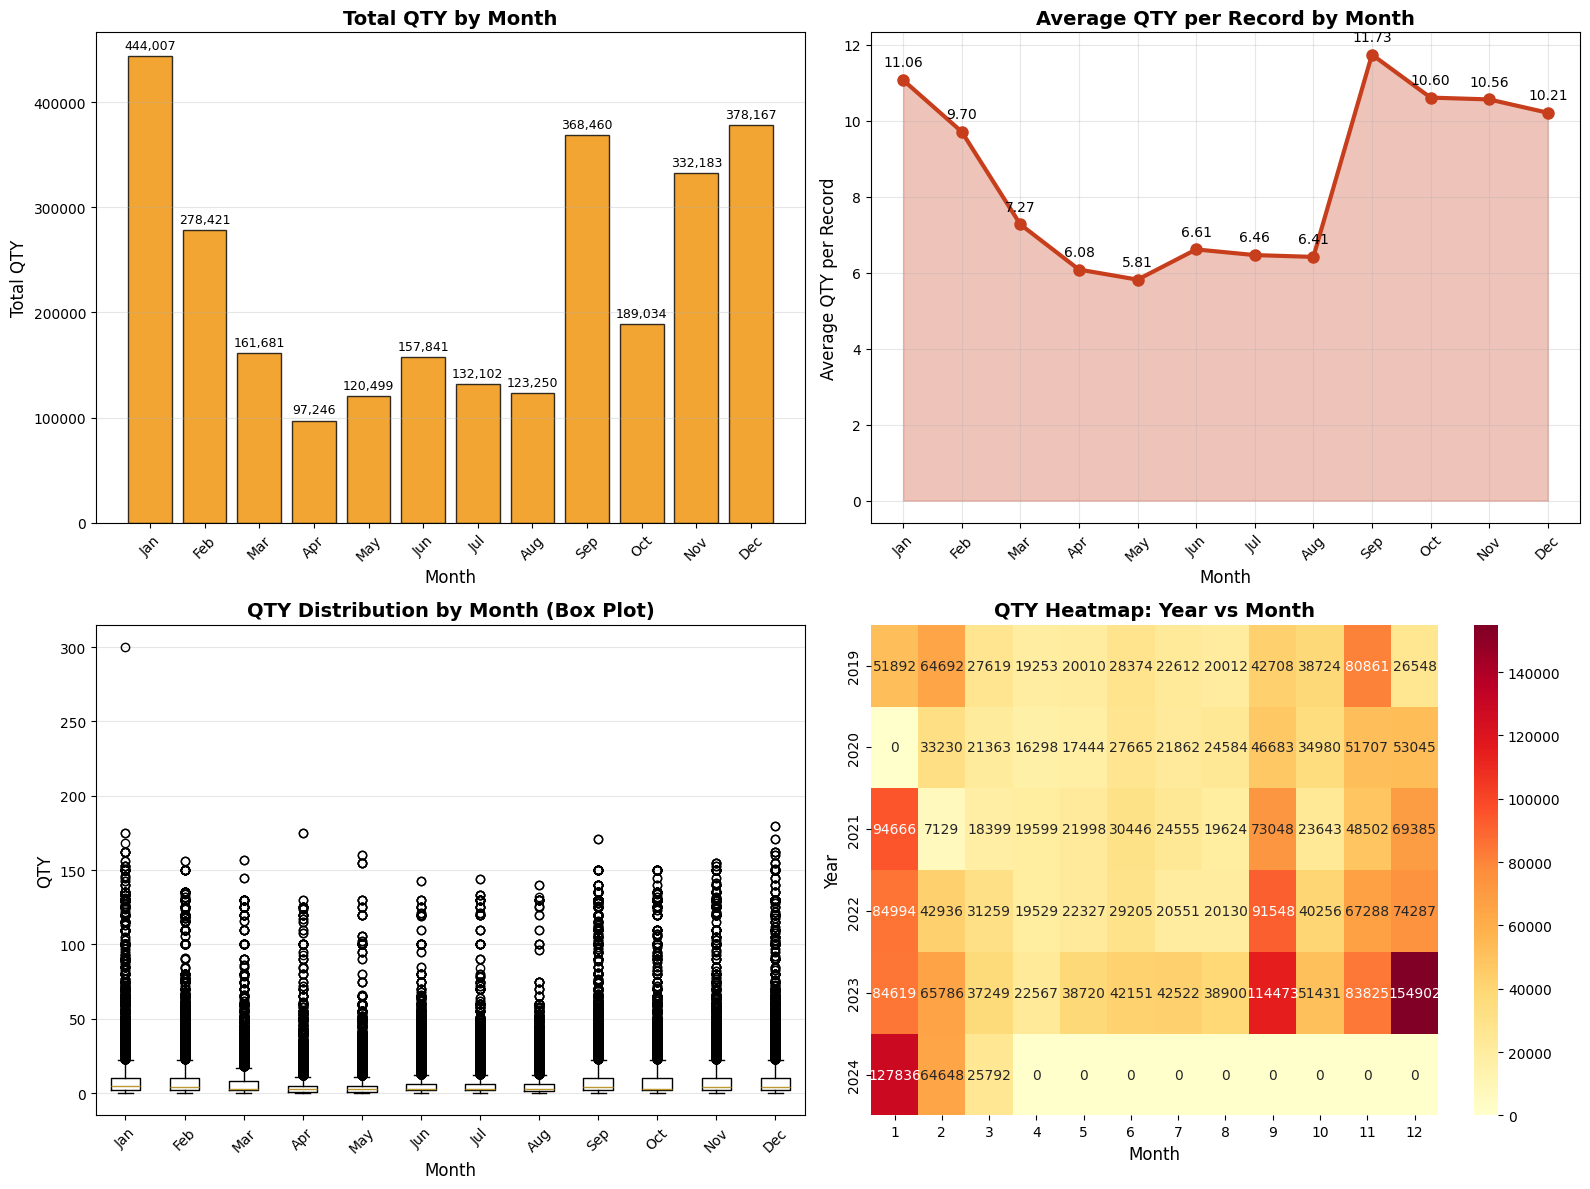


Seasonal Analysis:
Winter: Total QTY = 1,100,595.00, Avg QTY = 10.40
Spring: Total QTY = 379,426.00, Avg QTY = 6.43
Summer: Total QTY = 413,193.00, Avg QTY = 6.50
Autumn: Total QTY = 889,676.50, Avg QTY = 11.02


In [38]:
# 2. MONTHLY QTY PATTERNS CHART
print("\n=== 2. Monthly QTY Pattern Analysis ===")

# Calculate monthly aggregations
monthly_qty = df_standardized.groupby('Month')['QTY'].agg(['sum', 'mean', 'count']).reset_index()
monthly_qty.columns = ['Month', 'Total_QTY', 'Avg_QTY_per_Record', 'Record_Count']

# Add month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_qty['Month_Name'] = monthly_qty['Month'].apply(lambda x: month_names[x-1] if x <= 12 else f'Month {x}')

print("Monthly QTY Summary:")
print(monthly_qty[['Month_Name', 'Total_QTY', 'Avg_QTY_per_Record', 'Record_Count']].to_string(index=False))

# Create monthly pattern charts
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Total QTY by Month (Bar Chart)
bars = ax1.bar(monthly_qty['Month_Name'], monthly_qty['Total_QTY'], 
               color='#F18F01', alpha=0.8, edgecolor='black', linewidth=1)
ax1.set_title('Total QTY by Month', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Total QTY', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, qty in zip(bars, monthly_qty['Total_QTY']):
    height = bar.get_height()
    ax1.annotate(f'{qty:,.0f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

# Average QTY per Record by Month (Line Chart)
ax2.plot(monthly_qty['Month'], monthly_qty['Avg_QTY_per_Record'], 
         marker='o', linewidth=3, markersize=8, color='#C73E1D')
ax2.fill_between(monthly_qty['Month'], monthly_qty['Avg_QTY_per_Record'], alpha=0.3, color='#C73E1D')
ax2.set_title('Average QTY per Record by Month', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Average QTY per Record', fontsize=12)
ax2.set_xticks(monthly_qty['Month'])
ax2.set_xticklabels(monthly_qty['Month_Name'], rotation=45)
ax2.grid(True, alpha=0.3)

# Add value labels on points
for month, avg_qty in zip(monthly_qty['Month'], monthly_qty['Avg_QTY_per_Record']):
    ax2.annotate(f'{avg_qty:.2f}', (month, avg_qty), textcoords="offset points", xytext=(0,10), ha='center')

# Monthly QTY Distribution (Box Plot by Month)
monthly_data_for_box = []
monthly_labels = []
for month in sorted(df_standardized['Month'].unique()):
    month_data = df_standardized[df_standardized['Month'] == month]['QTY']
    if len(month_data) > 0:
        monthly_data_for_box.append(month_data)
        month_name = month_names[month-1] if month <= 12 else f'Month {month}'
        monthly_labels.append(month_name)

ax3.boxplot(monthly_data_for_box, labels=monthly_labels)
ax3.set_title('QTY Distribution by Month (Box Plot)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Month', fontsize=12)
ax3.set_ylabel('QTY', fontsize=12)
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

# Monthly QTY Heatmap (if we have multiple years)
year_month_qty = df_standardized.groupby(['YYYY', 'Month'])['QTY'].sum().unstack(fill_value=0)
if len(year_month_qty) > 1:  # Only create heatmap if we have multiple years
    sns.heatmap(year_month_qty, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax4)
    ax4.set_title('QTY Heatmap: Year vs Month', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Month', fontsize=12)
    ax4.set_ylabel('Year', fontsize=12)
else:
    ax4.text(0.5, 0.5, 'Heatmap requires multiple years of data', 
             ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    ax4.set_title('QTY Heatmap: Year vs Month (Not Available)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate seasonal patterns
print(f"\nSeasonal Analysis:")
seasons = {
    'Winter': [12, 1, 2], 'Spring': [3, 4, 5], 
    'Summer': [6, 7, 8], 'Autumn': [9, 10, 11]
}

for season, months in seasons.items():
    season_data = df_standardized[df_standardized['Month'].isin(months)]
    if len(season_data) > 0:
        total_qty = season_data['QTY'].sum()
        avg_qty = season_data['QTY'].mean()
        print(f"{season}: Total QTY = {total_qty:,.2f}, Avg QTY = {avg_qty:.2f}")



=== 3. Weekly QTY Distribution Analysis ===
Weekly QTY Summary:
 Week  Total_QTY  Avg_QTY_per_Record  Record_Count
    1   259656.0            8.400660         30909
    2   438243.0            8.127501         53921
    3   632119.5            8.802912         71808
    4  1452872.0            9.529279        152464


/var/folders/vg/pxkxmzld5s73d47lq0mx8hyr0000gn/T/ipykernel_66320/3198750486.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot(weekly_data_for_box, labels=weekly_labels)


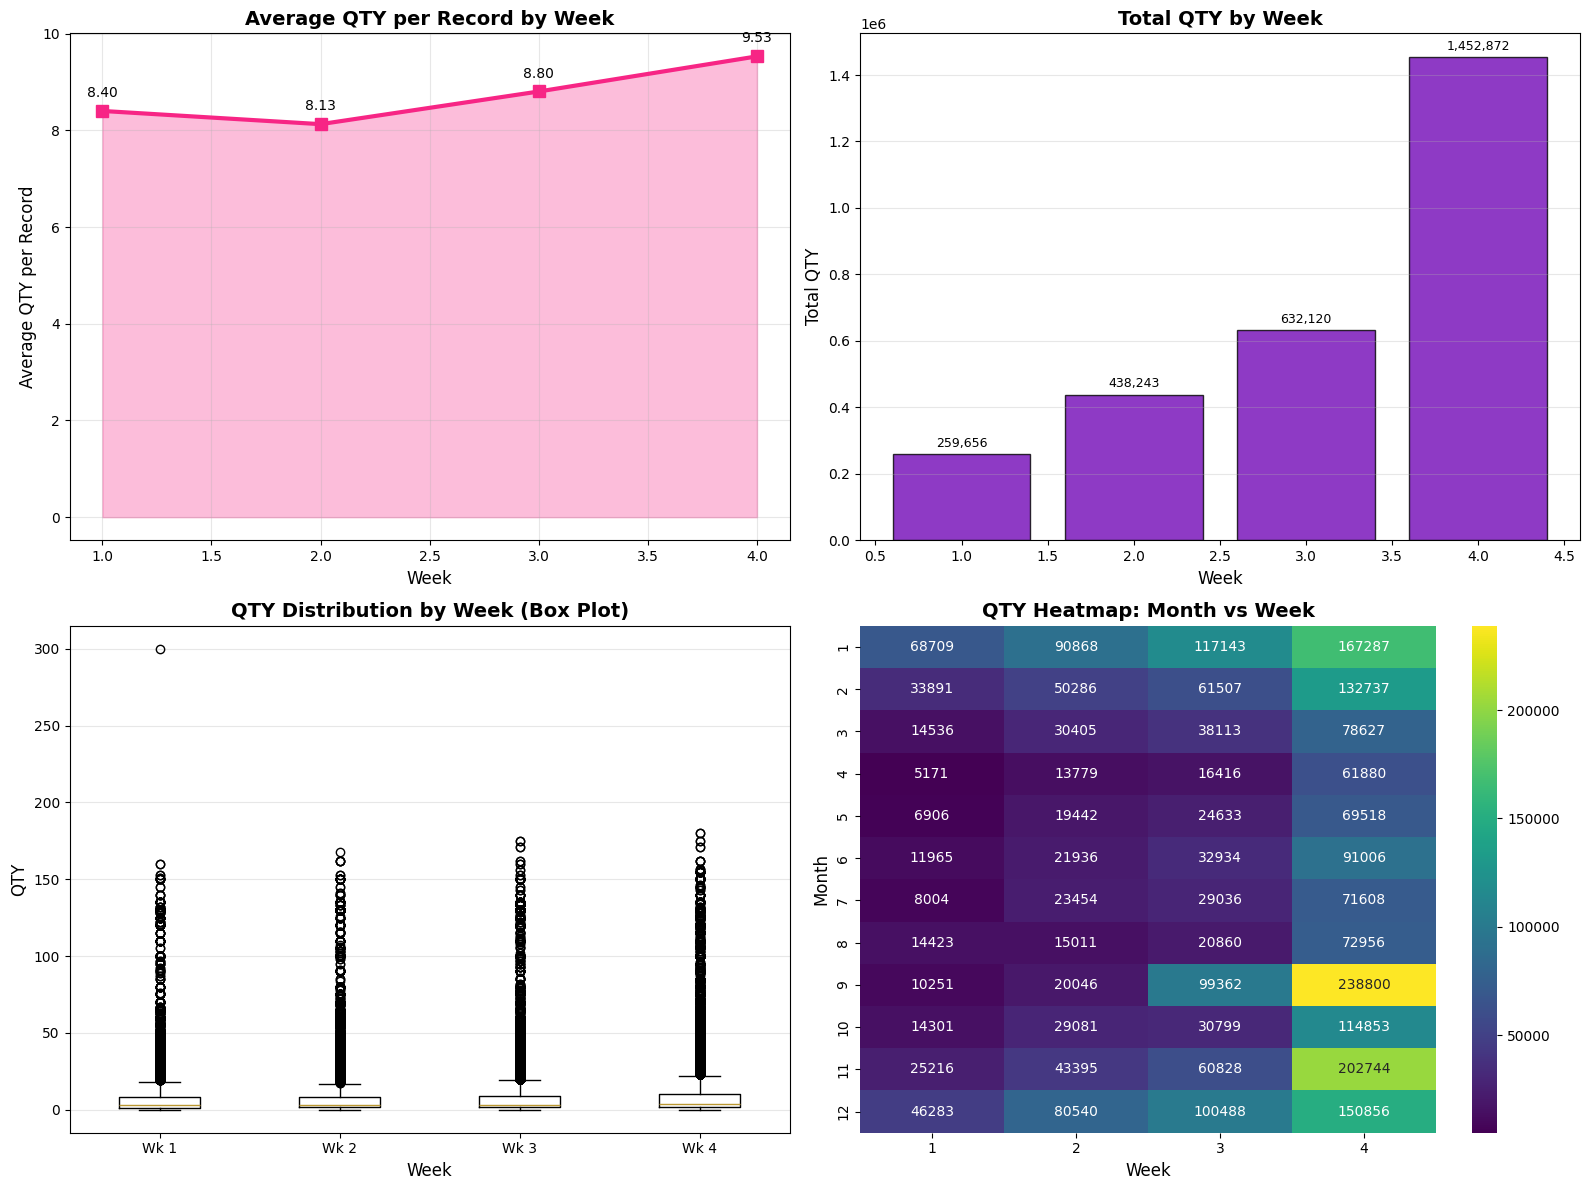


Weekly Pattern Analysis:
Best performing week: Week 4 (1,452,872.00 QTY)
Worst performing week: Week 1 (259,656.00 QTY)
Weekly QTY variance: 527,184.47
Weekly QTY coefficient of variation: 75.78%


In [39]:
# 3. WEEKLY QTY DISTRIBUTION CHART
print("\n=== 3. Weekly QTY Distribution Analysis ===")

# Calculate weekly aggregations
weekly_qty = df_standardized.groupby('Week')['QTY'].agg(['sum', 'mean', 'count']).reset_index()
weekly_qty.columns = ['Week', 'Total_QTY', 'Avg_QTY_per_Record', 'Record_Count']

print("Weekly QTY Summary:")
print(weekly_qty.to_string(index=False))

# Create weekly distribution charts
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Total QTY by Week (Bar Chart)
bars = ax2.bar(weekly_qty['Week'], weekly_qty['Total_QTY'], 
               color='#7209B7', alpha=0.8, edgecolor='black', linewidth=1)
ax2.set_title('Total QTY by Week', fontsize=14, fontweight='bold')
ax2.set_xlabel('Week', fontsize=12)
ax2.set_ylabel('Total QTY', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, qty in zip(bars, weekly_qty['Total_QTY']):
    height = bar.get_height()
    ax2.annotate(f'{qty:,.0f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

# Average QTY per Record by Week (Line Chart)
ax1.plot(weekly_qty['Week'], weekly_qty['Avg_QTY_per_Record'], 
         marker='s', linewidth=3, markersize=8, color='#F72585')
ax1.fill_between(weekly_qty['Week'], weekly_qty['Avg_QTY_per_Record'], alpha=0.3, color='#F72585')
ax1.set_title('Average QTY per Record by Week', fontsize=14, fontweight='bold')
ax1.set_xlabel('Week', fontsize=12)
ax1.set_ylabel('Average QTY per Record', fontsize=12)
ax1.grid(True, alpha=0.3)

# Add value labels on points
for week, avg_qty in zip(weekly_qty['Week'], weekly_qty['Avg_QTY_per_Record']):
    ax1.annotate(f'{avg_qty:.2f}', (week, avg_qty), textcoords="offset points", xytext=(0,10), ha='center')

# Weekly QTY Distribution (Box Plot by Week)
weekly_data_for_box = []
weekly_labels = []
for week in sorted(df_standardized['Week'].unique()):
    week_data = df_standardized[df_standardized['Week'] == week]['QTY']
    if len(week_data) > 0:
        weekly_data_for_box.append(week_data)
        weekly_labels.append(f'Wk {week}')

ax3.boxplot(weekly_data_for_box, labels=weekly_labels)
ax3.set_title('QTY Distribution by Week (Box Plot)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Week', fontsize=12)
ax3.set_ylabel('QTY', fontsize=12)
ax3.grid(True, alpha=0.3, axis='y')

# Week vs Month QTY Heatmap
week_month_qty = df_standardized.groupby(['Month', 'Week'])['QTY'].sum().unstack(fill_value=0)
if len(week_month_qty) > 0:
    sns.heatmap(week_month_qty, annot=True, fmt='.0f', cmap='viridis', ax=ax4)
    ax4.set_title('QTY Heatmap: Month vs Week', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Week', fontsize=12)
    ax4.set_ylabel('Month', fontsize=12)
else:
    ax4.text(0.5, 0.5, 'No data available for heatmap', 
             ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    ax4.set_title('QTY Heatmap: Month vs Week (Not Available)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate weekly patterns
print(f"\nWeekly Pattern Analysis:")
print(f"Best performing week: Week {weekly_qty.loc[weekly_qty['Total_QTY'].idxmax(), 'Week']} ({weekly_qty['Total_QTY'].max():,.2f} QTY)")
print(f"Worst performing week: Week {weekly_qty.loc[weekly_qty['Total_QTY'].idxmin(), 'Week']} ({weekly_qty['Total_QTY'].min():,.2f} QTY)")
print(f"Weekly QTY variance: {weekly_qty['Total_QTY'].std():,.2f}")
print(f"Weekly QTY coefficient of variation: {(weekly_qty['Total_QTY'].std() / weekly_qty['Total_QTY'].mean()) * 100:.2f}%")



=== 4. Combined Time Series Analysis ===


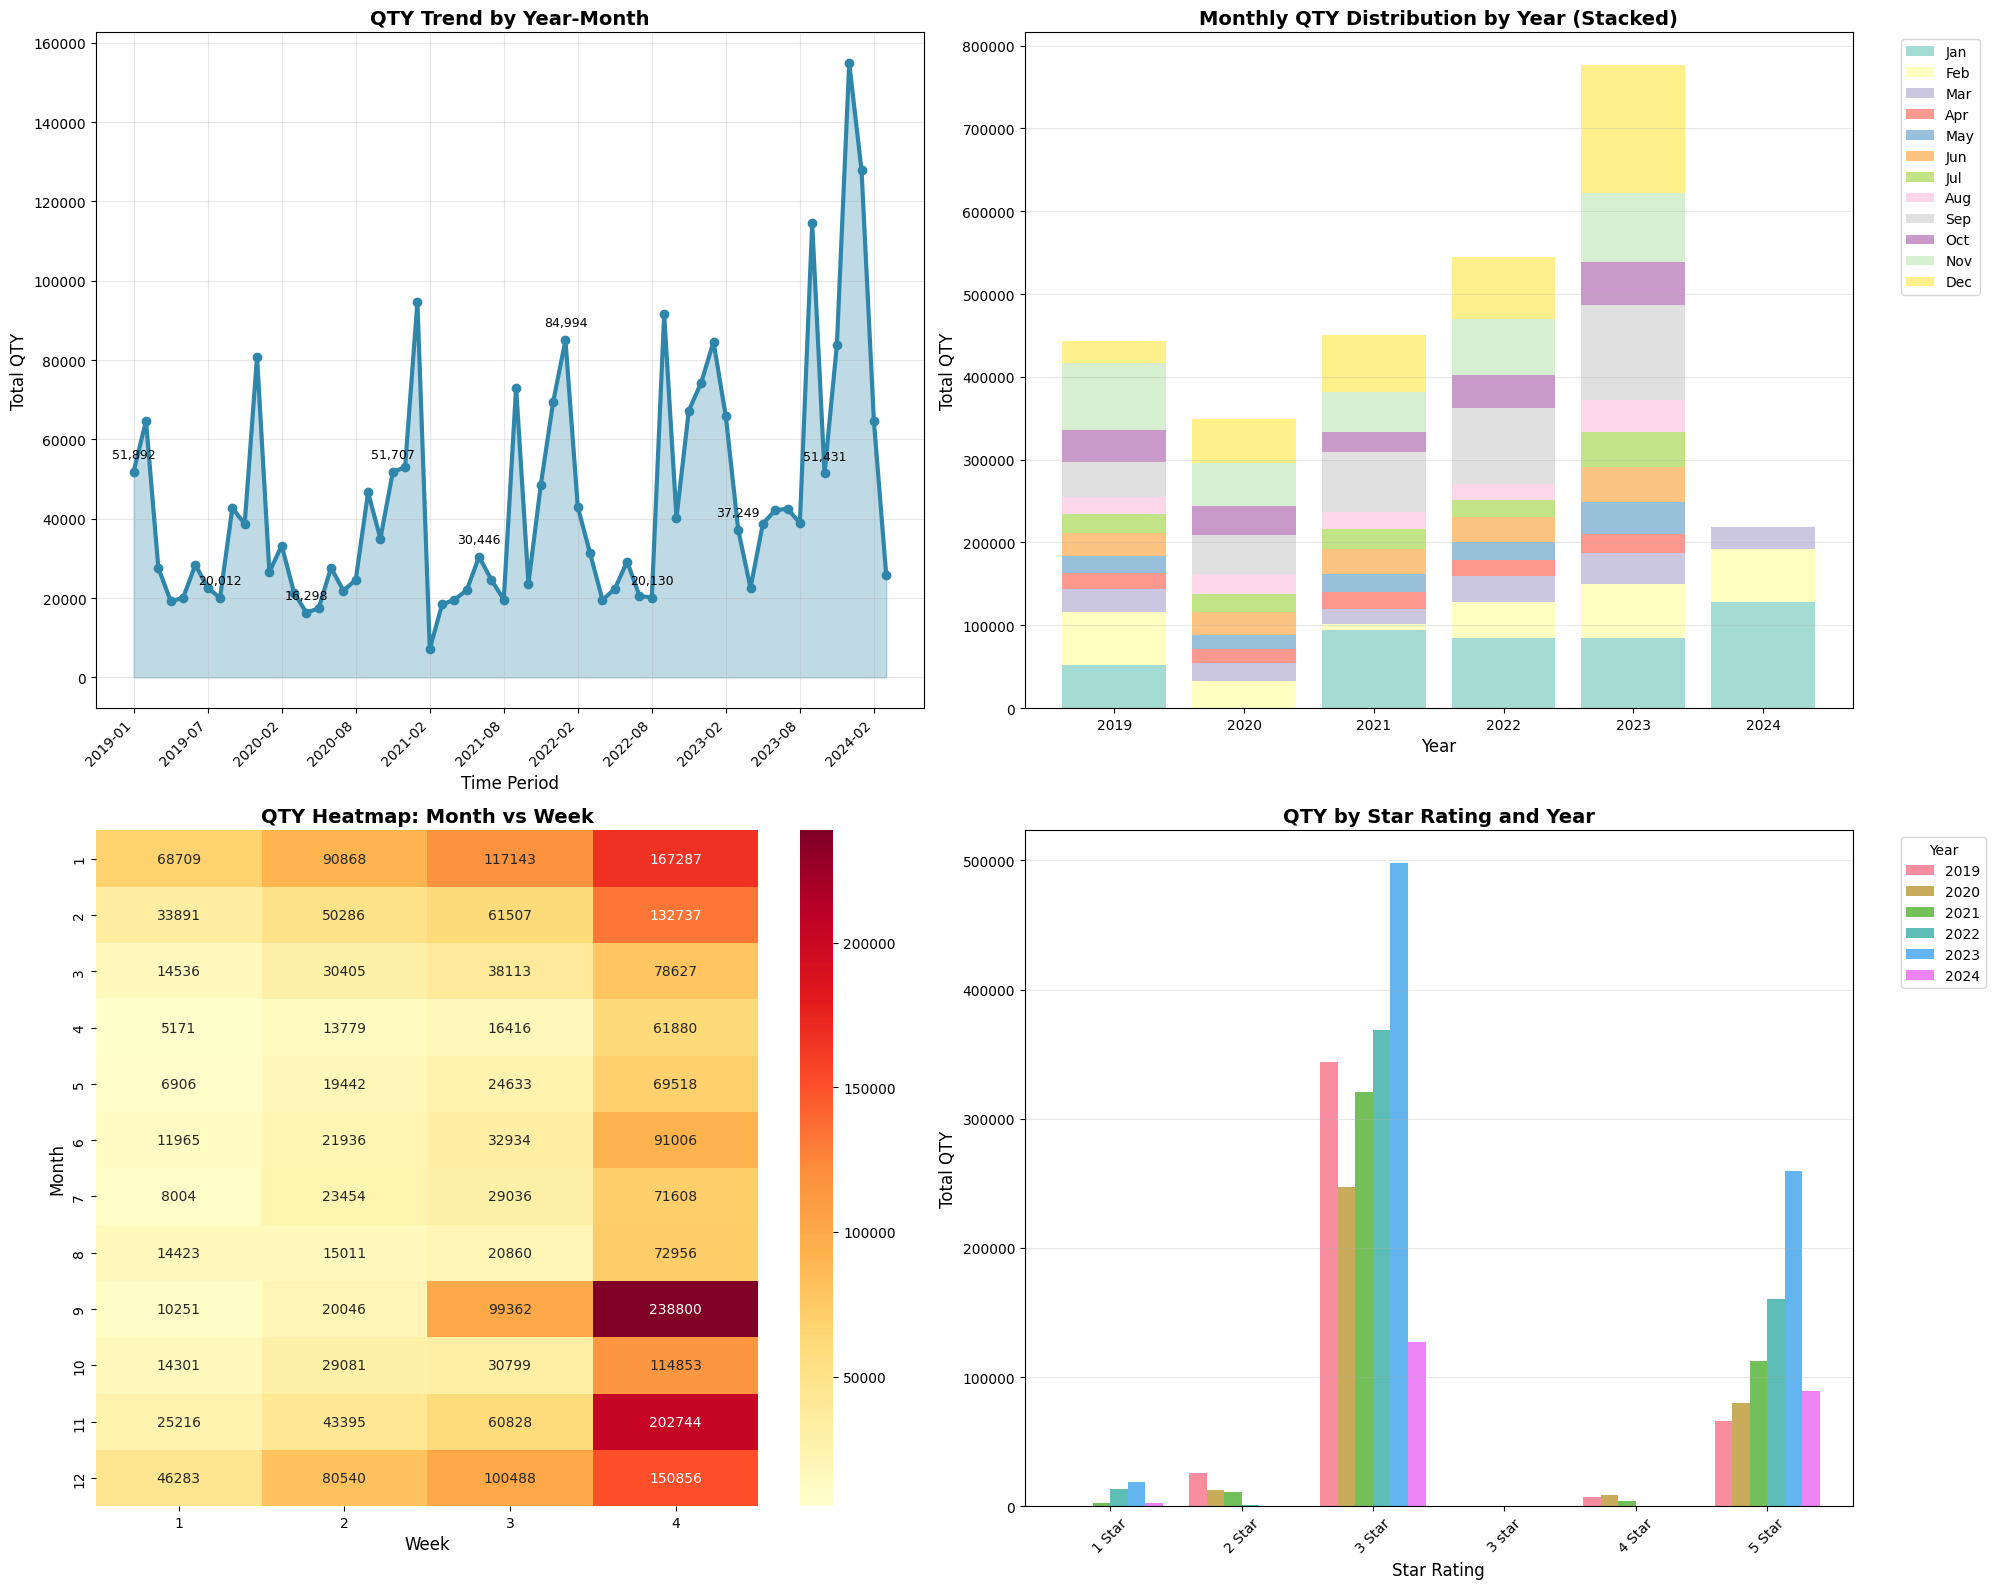


Time Series Summary:
Total time periods: 62
Peak QTY period: 2023-12 (154,902.00 QTY)
Lowest QTY period: 2021-02 (7,129.00 QTY)
Average QTY per period: 44,885.33
QTY standard deviation: 29,874.25


In [40]:
# 4. COMBINED TIME SERIES CHART
print("\n=== 4. Combined Time Series Analysis ===")

# Create a comprehensive time series chart
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. Year-Month QTY Trend (Line Chart)
year_month_qty = df_standardized.groupby(['YYYY', 'Month'])['QTY'].sum().reset_index()
year_month_qty['YearMonth'] = year_month_qty['YYYY'].astype(str) + '-' + year_month_qty['Month'].astype(str).str.zfill(2)
year_month_qty = year_month_qty.sort_values(['YYYY', 'Month'])

ax1.plot(range(len(year_month_qty)), year_month_qty['QTY'], 
         marker='o', linewidth=3, markersize=6, color='#2E86AB')
ax1.fill_between(range(len(year_month_qty)), year_month_qty['QTY'], alpha=0.3, color='#2E86AB')
ax1.set_title('QTY Trend by Year-Month', fontsize=14, fontweight='bold')
ax1.set_xlabel('Time Period', fontsize=12)
ax1.set_ylabel('Total QTY', fontsize=12)
ax1.grid(True, alpha=0.3)

# Set x-axis labels
step = max(1, len(year_month_qty) // 10)  # Show max 10 labels
ax1.set_xticks(range(0, len(year_month_qty), step))
ax1.set_xticklabels([year_month_qty.iloc[i]['YearMonth'] for i in range(0, len(year_month_qty), step)], 
                    rotation=45, ha='right')

# Add value labels on key points
for i in range(0, len(year_month_qty), max(1, len(year_month_qty) // 8)):
    ax1.annotate(f'{year_month_qty.iloc[i]["QTY"]:,.0f}', 
                (i, year_month_qty.iloc[i]['QTY']), 
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

# 2. Monthly QTY by Year (Stacked Bar Chart)
year_month_pivot = df_standardized.groupby(['YYYY', 'Month'])['QTY'].sum().unstack(fill_value=0)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create stacked bar chart
bottom = np.zeros(len(year_month_pivot))
colors = plt.cm.Set3(np.linspace(0, 1, len(year_month_pivot.columns)))

for i, month in enumerate(year_month_pivot.columns):
    month_name = month_names[month-1] if month <= 12 else f'Month {month}'
    ax2.bar(year_month_pivot.index, year_month_pivot[month], 
            bottom=bottom, label=month_name, color=colors[i], alpha=0.8)
    bottom += year_month_pivot[month]

ax2.set_title('Monthly QTY Distribution by Year (Stacked)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Total QTY', fontsize=12)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3, axis='y')

# 3. Weekly QTY by Month (Heatmap)
week_month_heatmap = df_standardized.groupby(['Month', 'Week'])['QTY'].sum().unstack(fill_value=0)
if len(week_month_heatmap) > 0:
    sns.heatmap(week_month_heatmap, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax3)
    ax3.set_title('QTY Heatmap: Month vs Week', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Week', fontsize=12)
    ax3.set_ylabel('Month', fontsize=12)
else:
    ax3.text(0.5, 0.5, 'Insufficient data for heatmap', 
             ha='center', va='center', transform=ax3.transAxes, fontsize=12)
    ax3.set_title('QTY Heatmap: Month vs Week (Not Available)', fontsize=14, fontweight='bold')

# 4. QTY Distribution by Star Rating and Time
star_rating_qty = df_standardized.groupby(['Star Rating', 'YYYY'])['QTY'].sum().unstack(fill_value=0)
if len(star_rating_qty) > 0:
    star_rating_qty.plot(kind='bar', ax=ax4, width=0.8, alpha=0.8)
    ax4.set_title('QTY by Star Rating and Year', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Star Rating', fontsize=12)
    ax4.set_ylabel('Total QTY', fontsize=12)
    ax4.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(True, alpha=0.3, axis='y')
else:
    ax4.text(0.5, 0.5, 'Insufficient data for Star Rating analysis', 
             ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    ax4.set_title('QTY by Star Rating and Year (Not Available)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nTime Series Summary:")
print(f"Total time periods: {len(year_month_qty)}")
print(f"Peak QTY period: {year_month_qty.loc[year_month_qty['QTY'].idxmax(), 'YearMonth']} ({year_month_qty['QTY'].max():,.2f} QTY)")
print(f"Lowest QTY period: {year_month_qty.loc[year_month_qty['QTY'].idxmin(), 'YearMonth']} ({year_month_qty['QTY'].min():,.2f} QTY)")
print(f"Average QTY per period: {year_month_qty['QTY'].mean():,.2f}")
print(f"QTY standard deviation: {year_month_qty['QTY'].std():,.2f}")



=== 5. Comprehensive Heatmap Analysis ===


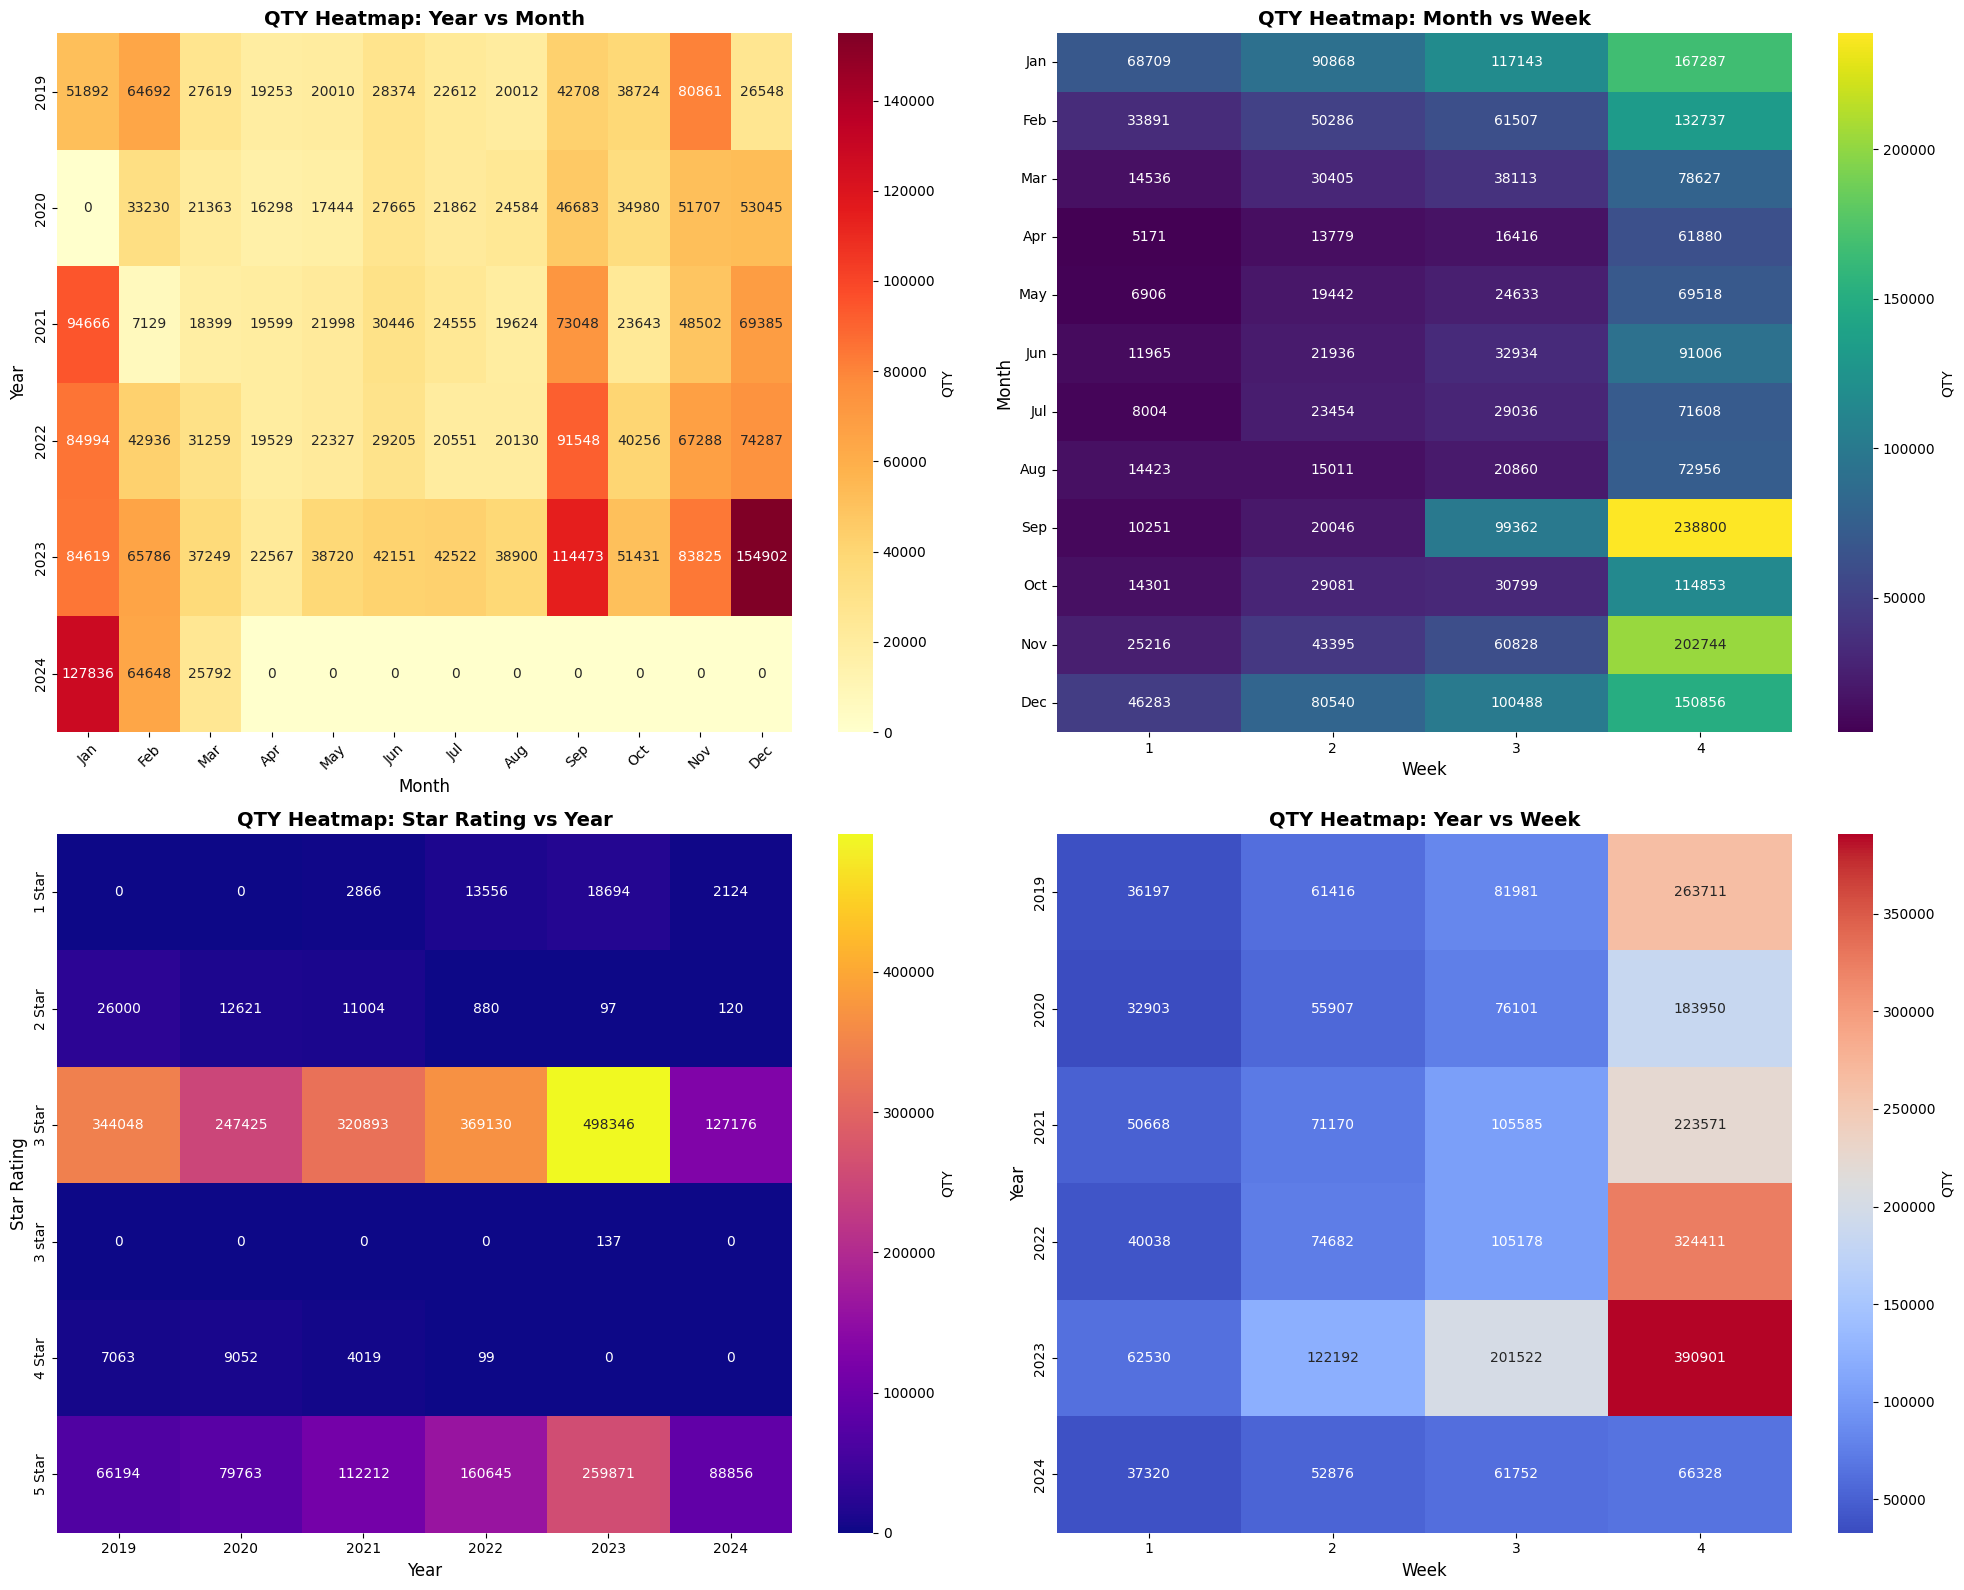


=== Correlation Analysis ===
Correlation Matrix:
        YYYY  Month   Week    QTY
YYYY   1.000 -0.107 -0.021  0.079
Month -0.107  1.000  0.059  0.027
Week  -0.021  0.059  1.000  0.032
QTY    0.079  0.027  0.032  1.000


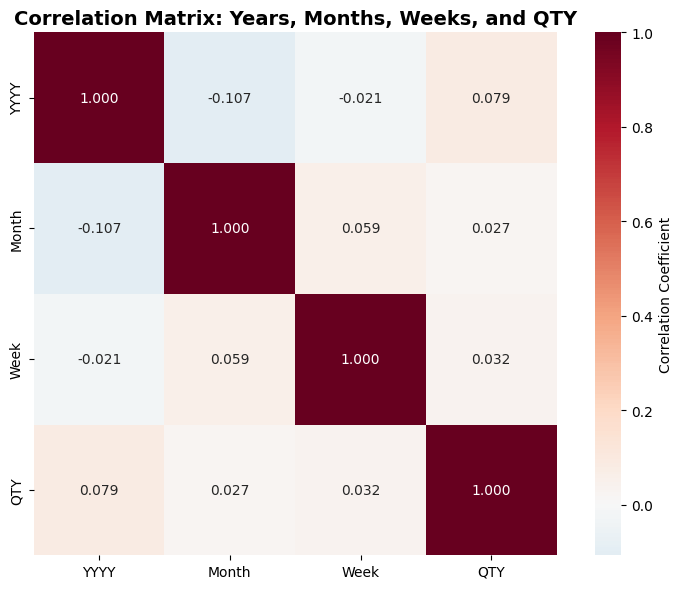


=== Summary of All Charts Created ===
✅ 1. Yearly QTY Trend Chart - Shows year-over-year growth and patterns
✅ 2. Monthly QTY Pattern Chart - Shows seasonal patterns and monthly distributions
✅ 3. Weekly QTY Distribution Chart - Shows weekly performance patterns
✅ 4. Combined Time Series Chart - Shows comprehensive time-based analysis
✅ 5. Comprehensive Heatmap Analysis - Shows multi-dimensional QTY patterns
✅ 6. Correlation Analysis - Shows relationships between time dimensions and QTY

All charts have been successfully created and saved to your notebook!


In [41]:
# 5. COMPREHENSIVE HEATMAP ANALYSIS
print("\n=== 5. Comprehensive Heatmap Analysis ===")

# Create a large figure with multiple heatmaps
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. Year-Month QTY Heatmap
year_month_heatmap = df_standardized.groupby(['YYYY', 'Month'])['QTY'].sum().unstack(fill_value=0)
if len(year_month_heatmap) > 0:
    sns.heatmap(year_month_heatmap, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax1, cbar_kws={'label': 'QTY'})
    ax1.set_title('QTY Heatmap: Year vs Month', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Month', fontsize=12)
    ax1.set_ylabel('Year', fontsize=12)
    
    # Add month names to x-axis
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    if len(year_month_heatmap.columns) <= 12:
        ax1.set_xticklabels([month_names[i-1] if i <= 12 else f'M{i}' for i in year_month_heatmap.columns], rotation=45)
else:
    ax1.text(0.5, 0.5, 'Insufficient data for Year-Month heatmap', 
             ha='center', va='center', transform=ax1.transAxes, fontsize=12)
    ax1.set_title('QTY Heatmap: Year vs Month (Not Available)', fontsize=14, fontweight='bold')

# 2. Month-Week QTY Heatmap
month_week_heatmap = df_standardized.groupby(['Month', 'Week'])['QTY'].sum().unstack(fill_value=0)
if len(month_week_heatmap) > 0:
    sns.heatmap(month_week_heatmap, annot=True, fmt='.0f', cmap='viridis', ax=ax2, cbar_kws={'label': 'QTY'})
    ax2.set_title('QTY Heatmap: Month vs Week', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Week', fontsize=12)
    ax2.set_ylabel('Month', fontsize=12)
    
    # Add month names to y-axis
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    if len(month_week_heatmap.index) <= 12:
        ax2.set_yticklabels([month_names[i-1] if i <= 12 else f'M{i}' for i in month_week_heatmap.index], rotation=0)
else:
    ax2.text(0.5, 0.5, 'Insufficient data for Month-Week heatmap', 
             ha='center', va='center', transform=ax2.transAxes, fontsize=12)
    ax2.set_title('QTY Heatmap: Month vs Week (Not Available)', fontsize=14, fontweight='bold')

# 3. Star Rating vs Year QTY Heatmap
star_year_heatmap = df_standardized.groupby(['Star Rating', 'YYYY'])['QTY'].sum().unstack(fill_value=0)
if len(star_year_heatmap) > 0:
    sns.heatmap(star_year_heatmap, annot=True, fmt='.0f', cmap='plasma', ax=ax3, cbar_kws={'label': 'QTY'})
    ax3.set_title('QTY Heatmap: Star Rating vs Year', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Year', fontsize=12)
    ax3.set_ylabel('Star Rating', fontsize=12)
else:
    ax3.text(0.5, 0.5, 'Insufficient data for Star Rating-Year heatmap', 
             ha='center', va='center', transform=ax3.transAxes, fontsize=12)
    ax3.set_title('QTY Heatmap: Star Rating vs Year (Not Available)', fontsize=14, fontweight='bold')

# 4. Year-Week QTY Heatmap
year_week_heatmap = df_standardized.groupby(['YYYY', 'Week'])['QTY'].sum().unstack(fill_value=0)
if len(year_week_heatmap) > 0:
    sns.heatmap(year_week_heatmap, annot=True, fmt='.0f', cmap='coolwarm', ax=ax4, cbar_kws={'label': 'QTY'})
    ax4.set_title('QTY Heatmap: Year vs Week', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Week', fontsize=12)
    ax4.set_ylabel('Year', fontsize=12)
else:
    ax4.text(0.5, 0.5, 'Insufficient data for Year-Week heatmap', 
             ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    ax4.set_title('QTY Heatmap: Year vs Week (Not Available)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Additional analysis: Correlation matrix
print(f"\n=== Correlation Analysis ===")
correlation_data = df_standardized[['YYYY', 'Month', 'Week', 'QTY']].corr()
print("Correlation Matrix:")
print(correlation_data.round(3))

# Create correlation heatmap
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, fmt='.3f', cmap='RdBu_r', center=0, 
            square=True, ax=ax, cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title('Correlation Matrix: Years, Months, Weeks, and QTY', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n=== Summary of All Charts Created ===")
print("✅ 1. Yearly QTY Trend Chart - Shows year-over-year growth and patterns")
print("✅ 2. Monthly QTY Pattern Chart - Shows seasonal patterns and monthly distributions")
print("✅ 3. Weekly QTY Distribution Chart - Shows weekly performance patterns")
print("✅ 4. Combined Time Series Chart - Shows comprehensive time-based analysis")
print("✅ 5. Comprehensive Heatmap Analysis - Shows multi-dimensional QTY patterns")
print("✅ 6. Correlation Analysis - Shows relationships between time dimensions and QTY")
print(f"\nAll charts have been successfully created and saved to your notebook!")


In [231]:
# Create time series dataset for machine learning
print("=== Creating Time Series Dataset for Machine Learning ===")

# First, let's create a proper time series by aggregating data by month
# We'll use the Billing Date to create a proper datetime index

# Create a copy of the standardized data
ts_data = df_standardized.copy()

# Ensure Billing Date is datetime
ts_data['Billing Date'] = pd.to_datetime(ts_data['Billing Date'])

# Create monthly aggregated time series
monthly_sales_ts = ts_data.groupby([ts_data['Billing Date'].dt.to_period('M')])['QTY'].sum()
monthly_sales_ts.index = monthly_sales_ts.index.to_timestamp()

print(f"Monthly time series created:")
print(f"Shape: {monthly_sales_ts.shape}")
print(f"Date range: {monthly_sales_ts.index.min()} to {monthly_sales_ts.index.max()}")
print(f"Total QTY: {monthly_sales_ts.sum():,.2f}")

# Display first few rows
print(f"\nFirst 10 months of data:")
monthly_sales_ts.columns = ['Billing Date','QTY']
print(monthly_sales_ts.head(10))


=== Creating Time Series Dataset for Machine Learning ===
Monthly time series created:
Shape: (59,)
Date range: 2019-04-01 00:00:00 to 2024-03-01 00:00:00
Total QTY: 2,564,614.50

First 10 months of data:
Billing Date
2019-04-01    51892.0
2019-05-01    64692.0
2019-06-01    27619.0
2019-07-01    19253.0
2019-08-01    20010.0
2019-09-01    28374.0
2019-10-01    22612.0
2019-11-01    20012.0
2019-12-01    42708.0
2020-01-01    38724.0
Name: QTY, dtype: float64


In [232]:
df_standardized.head()

,Month,Week,Billing Date,YYYY,M_C,W_C,QTY,Category
0,1,1,2019-04-06,2019,1,1,1.0,0.0_Chennai_3 Star
1,1,1,2019-04-06,2019,1,1,1.0,1.8_Chennai_3 Star
2,1,1,2019-04-06,2019,1,1,1.0,0.0_Cochin_5 Star
3,1,1,2019-04-06,2019,1,1,1.0,1.5_Cochin_5 Star
4,1,1,2019-04-06,2019,1,1,2.0,0.0_Cochin_5 Star


In [242]:
# Create time series features for machine learning
def create_time_features(df):
    """Create time-based features for machine learning"""
    features_df = df.copy()
    
    # Time-based features
    features_df['month'] = features_df.index.month
    features_df['quarter'] = features_df.index.quarter
    features_df['year'] = features_df.index.year
    features_df['day_of_year'] = features_df.index.dayofyear
    
    # Cyclical features (sin/cos encoding)
    features_df['month_sin'] = np.sin(2 * np.pi * features_df['month'] / 12)
    features_df['month_cos'] = np.cos(2 * np.pi * features_df['month'] / 12)
    features_df['quarter_sin'] = np.sin(2 * np.pi * features_df['quarter'] / 4)
    features_df['quarter_cos'] = np.cos(2 * np.pi * features_df['quarter'] / 4)
    
    # Lag features (previous months' sales)
    for lag in [1, 2, 3, 6, 12]:
        features_df[f'lag_{lag}'] = features_df['QTY'].shift(lag)
    
    # Rolling statistics (moving averages)
    for window in [3, 6, 12]:
        features_df[f'rolling_mean_{window}'] = features_df['QTY'].shift(1).rolling(window=window).mean()
        features_df[f'rolling_std_{window}'] = features_df['QTY'].shift(1).rolling(window=window).std()

    
    for window in [3, 6, 12]:
        features_df[f'ema_{window}'] = features_df['QTY'].shift(1).ewm(span=window).mean()

    features_df['growth_rate_1m'] = features_df['QTY'].pct_change(1)
    features_df['growth_rate_12m'] = features_df['QTY'].pct_change(12)
    # Trend feature (time since start)
    features_df['time_trend'] = np.arange(len(features_df))
    
    return features_df

# Create features
monthly_features = create_time_features(monthly_sales_ts.to_frame())
print("Time series features created:")
print(monthly_features.head(10))
print(f"\nFeature columns: {list(monthly_features.columns)}")


Time series features created:
                  QTY  month  quarter  year  day_of_year     month_sin  \
Billing Date                                                             
2019-04-01    51892.0      4        2  2019           91  8.660254e-01   
2019-05-01    64692.0      5        2  2019          121  5.000000e-01   
2019-06-01    27619.0      6        2  2019          152  1.224647e-16   
2019-07-01    19253.0      7        3  2019          182 -5.000000e-01   
2019-08-01    20010.0      8        3  2019          213 -8.660254e-01   
2019-09-01    28374.0      9        3  2019          244 -1.000000e+00   
2019-10-01    22612.0     10        4  2019          274 -8.660254e-01   
2019-11-01    20012.0     11        4  2019          305 -5.000000e-01   
2019-12-01    42708.0     12        4  2019          335 -2.449294e-16   
2020-01-01    38724.0      1        1  2020            1  5.000000e-01   

                 month_cos   quarter_sin   quarter_cos    lag_1    lag_2  \
Billi

In [243]:
monthly_features.head()

,QTY,month,quarter,year,day_of_year,month_sin,month_cos,quarter_sin,quarter_cos,lag_1,lag_2,lag_3,lag_6,lag_12,rolling_mean_3,rolling_std_3,rolling_mean_6,rolling_std_6,rolling_mean_12,rolling_std_12,ema_3,ema_6,ema_12,growth_rate_1m,growth_rate_12m,time_trend
Billing Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-01,51892.0,4,2,2019,91,8.660254e-01,-0.500000,1.224647e-16,-1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2019-05-01,64692.0,5,2,2019,121,5.000000e-01,-0.866025,1.224647e-16,-1.000000e+00,51892.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51892.000000,51892.000000,51892.000000,0.246666,NaN,1
2019-06-01,27619.0,6,2,2019,152,1.224647e-16,-1.000000,1.224647e-16,-1.000000e+00,64692.0,51892.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60425.333333,59358.666667,58825.333333,-0.573069,NaN,2
2019-07-01,19253.0,7,3,2019,182,-5.000000e-01,-0.866025,-1.000000e+00,-1.836970e-16,27619.0,64692.0,51892.0,NaN,NaN,48067.666667,18830.055134,NaN,NaN,NaN,NaN,41678.857143,45090.376147,46645.494226,-0.302907,NaN,3
2019-08-01,20010.0,8,3,2019,213,-8.660254e-01,-0.500000,-1.000000e+00,-1.836970e-16,19253.0,27619.0,64692.0,NaN,NaN,37188.000000,24183.672198,NaN,NaN,NaN,NaN,29718.400000,35110.398649,37998.754310,0.039319,NaN,4


In [236]:
monthly_features.columns

Index(['QTY', 'month', 'quarter', 'year', 'day_of_year', 'month_sin',
       'month_cos', 'quarter_sin', 'quarter_cos', 'lag_1', 'lag_2', 'lag_3',
       'lag_6', 'lag_12', 'rolling_mean_3', 'rolling_std_3', 'rolling_mean_6',
       'rolling_std_6', 'rolling_mean_12', 'rolling_std_12', 'time_trend'],
      dtype='object')

In [244]:
# Prepare data for training (remove NaN values from lag/rolling features)
from sklearn.preprocessing import StandardScaler
training_data = monthly_features.dropna().copy()
print(f"Training data points after removing NaN: {len(training_data)}")

# Separate features and target
feature_cols = [col for col in training_data.columns if col != 'QTY']
X = training_data[feature_cols]
y = training_data['QTY']

# Split data for time series (use first 80% for training, last 20% for testing)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")
print(f"Training period: {X_train.index[0]} to {X_train.index[-1]}")
print(f"Test period: {X_test.index[0]} to {X_test.index[-1]}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training data points after removing NaN: 47
Training set: 37 samples
Test set: 10 samples
Training period: 2020-05-01 00:00:00 to 2023-05-01 00:00:00
Test period: 2023-06-01 00:00:00 to 2024-03-01 00:00:00


In [245]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Train multiple machine learning models
models = {}
predictions = {}
metrics = {}

# 1a. Linear Regression
print("Training Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

models['Linear Regression'] = lr_model
predictions['Linear Regression'] = lr_pred

# 1b. Ridge Regression
print("Training Ridge Regression...")
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

models['Ridge'] = ridge
predictions['Ridge'] = ridge.predict(X_test_scaled)


# 1c. Lasso Regression
print("Training Lasso Regression...")
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

models['Lasso'] = lasso
predictions['Lasso'] = lasso.predict(X_test_scaled)

# 1d. ElasticNet Regression
print("Training ElasticNet Regression...")
en = ElasticNet(alpha=0.01, l1_ratio=0.5)
en.fit(X_train_scaled, y_train)

models['ElasticNet'] = en
predictions['ElasticNet'] = en.predict(X_test_scaled)

# 1e. Bayesian Ridge
print("Training Bayesian Ridge...")
br = BayesianRidge()
br.fit(X_train_scaled, y_train)

models['BayesianRidge'] = br
predictions['BayesianRidge'] = br.predict(X_test_scaled)


# 2. Random Forest
print("Training Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)  # RF can handle unscaled data
rf_pred = rf_model.predict(X_test)

models['Random Forest'] = rf_model
predictions['Random Forest'] = rf_pred


# 2b. Gradient Boosting
print("Training Gradient Boosting...")
gb = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

models['Gradient Boosting'] = gb
predictions['Gradient Boosting'] = gb.predict(X_test)


# 2c. Extra Trees
print("Training Extra Trees...")
et = ExtraTreesRegressor(n_estimators=100, max_depth=10, random_state=42)
et.fit(X_train, y_train)

models['Extra Trees'] = et
predictions['Extra Trees'] = et.predict(X_test)

# 3a. Support Vector Regression
print("Training SVR...")
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)  # SVR needs scaled data

models['SVR'] = svr
predictions['SVR'] = svr.predict(X_test_scaled)



# 4. Simple trend model (polynomial regression)
print("Training Polynomial Trend...")
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

# Use only time trend for polynomial model
X_train_trend = X_train[['time_trend']]
X_test_trend = X_test[['time_trend']]

poly_model.fit(X_train_trend, y_train)
poly_pred = poly_model.predict(X_test_trend)

models['Polynomial Trend'] = poly_model
predictions['Polynomial Trend'] = poly_pred



# ------------------------------
# 5. Neural Network
# ------------------------------
print("Training MLP Regressor...")
mlp = MLPRegressor(hidden_layer_sizes=(64,64), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

models['MLP'] = mlp
predictions['MLP'] = mlp.predict(X_test_scaled)


print("All models trained successfully!")


Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training ElasticNet Regression...
Training Bayesian Ridge...
Training Random Forest...
Training Gradient Boosting...
Training Extra Trees...
Training SVR...
Training Polynomial Trend...
Training MLP Regressor...
All models trained successfully!


In [246]:
# Evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    """Calculate evaluation metrics for a model"""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # Mean Absolute Percentage Error
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    return {
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape
    }

# Evaluate all models
results = []
for model_name, pred in predictions.items():
    metrics = evaluate_model(y_test, pred, model_name)
    results.append(metrics)

# Create results DataFrame
results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print("="*60)
print(results_df.round(2))

# Find best model
best_model_idx = results_df['RMSE'].idxmin()
best_model_name = results_df.loc[best_model_idx, 'Model']
print(f"\nBest performing model: {best_model_name}")
print(f"Best RMSE: {results_df.loc[best_model_idx, 'RMSE']:.2f}")
print(f"Best R²: {results_df.loc[best_model_idx, 'R²']:.3f}")
print(f"Best MAPE: {results_df.loc[best_model_idx, 'MAPE']:.2f}%")

Model Performance Comparison:
                Model       MAE           MSE      RMSE    R²   MAPE
0   Linear Regression  42787.29  2.337755e+09  48350.34 -0.46  77.12
1               Ridge  17696.42  6.597826e+08  25686.23  0.59  25.96
2               Lasso  26944.31  1.101020e+09  33181.62  0.31  44.92
3          ElasticNet  24503.44  9.685372e+08  31121.33  0.39  40.16
4       BayesianRidge  14249.75  5.503212e+08  23458.93  0.66  18.25
5       Random Forest  16648.38  8.977684e+08  29962.78  0.44  18.20
6   Gradient Boosting  23206.56  1.243452e+09  35262.62  0.22  29.97
7         Extra Trees  18524.21  8.791306e+08  29650.14  0.45  24.74
8                 SVR  33799.26  2.636652e+09  51348.34 -0.65  41.06
9    Polynomial Trend  33750.82  1.392661e+09  37318.37  0.13  73.14
10                MLP  34234.98  1.619243e+09  40239.82 -0.01  61.25

Best performing model: BayesianRidge
Best RMSE: 23458.93
Best R²: 0.656
Best MAPE: 18.25%


In [247]:
# Ensure 'Billing Date' is a datetime
df_standardized['Billing Date'] = pd.to_datetime(df_standardized['Billing Date'])

# Group by month start date and sum QTY
monthly_sales = (
    df_standardized
    .groupby(pd.Grouper(key='Billing Date', freq='MS'))['QTY']
    .sum()
    .reset_index()
    .rename(columns={'QTY': 'Total_QTY'})
)
monthly_sales = monthly_sales[monthly_sales['Total_QTY'] != 0]

In [248]:
# Add Prophet model for comparison and future forecasting
from prophet import Prophet

print("Training Prophet model...")

# Prepare data for Prophet (needs 'ds' and 'y' columns)
prophet_data = monthly_sales.copy()
prophet_data = prophet_data.rename(columns={'Billing Date': 'ds', 'Total_QTY': 'y'})

# Split Prophet data for training
split_date = X_train.index[-1]
prophet_train = prophet_data[prophet_data['ds'] <= split_date].copy()
prophet_test = prophet_data[prophet_data['ds'] > split_date].copy()

# Train Prophet model
prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)

prophet_model.fit(prophet_train)

# Make predictions on test set
prophet_future_test = prophet_test[['ds']].copy()
prophet_pred_test = prophet_model.predict(prophet_future_test)

# Evaluate Prophet
prophet_metrics = evaluate_model(prophet_test['y'].values, 
                                prophet_pred_test['yhat'].values, 
                                'Prophet')

print("Prophet model trained and evaluated!")
print(f"Prophet RMSE: {prophet_metrics['RMSE']:.2f}")
print(f"Prophet R²: {prophet_metrics['R²']:.3f}")
print(f"Prophet MAPE: {prophet_metrics['MAPE']:.2f}%")

# Add Prophet to results
results.append(prophet_metrics)
final_results_df = pd.DataFrame(results)
print("\nUpdated Model Performance Comparison:")
print("="*60)
print(final_results_df.round(2))

13:34:22 - cmdstanpy - INFO - Chain [1] start processing


Training Prophet model...


13:34:22 - cmdstanpy - INFO - Chain [1] done processing


Prophet model trained and evaluated!
Prophet RMSE: 34811.06
Prophet R²: 0.242
Prophet MAPE: 27.58%

Updated Model Performance Comparison:
                Model       MAE           MSE      RMSE    R²   MAPE
0   Linear Regression  42787.29  2.337755e+09  48350.34 -0.46  77.12
1               Ridge  17696.42  6.597826e+08  25686.23  0.59  25.96
2               Lasso  26944.31  1.101020e+09  33181.62  0.31  44.92
3          ElasticNet  24503.44  9.685372e+08  31121.33  0.39  40.16
4       BayesianRidge  14249.75  5.503212e+08  23458.93  0.66  18.25
5       Random Forest  16648.38  8.977684e+08  29962.78  0.44  18.20
6   Gradient Boosting  23206.56  1.243452e+09  35262.62  0.22  29.97
7         Extra Trees  18524.21  8.791306e+08  29650.14  0.45  24.74
8                 SVR  33799.26  2.636652e+09  51348.34 -0.65  41.06
9    Polynomial Trend  33750.82  1.392661e+09  37318.37  0.13  73.14
10                MLP  34234.98  1.619243e+09  40239.82 -0.01  61.25
11            Prophet  21045.30  1

In [261]:
future_months = 6
print(f"Generating predictions for next {future_months} months...")

# Create future dates
last_date = monthly_sales_ts.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), 
                            periods=future_months, 
                            freq='MS')

print(f"Predicting from {future_dates[0].strftime('%Y-%m')} to {future_dates[-1].strftime('%Y-%m')}")

# 1. Prophet Future Predictions
prophet_future_all = prophet_model.make_future_dataframe(periods=future_months, freq='MS')
prophet_forecast = prophet_model.predict(prophet_future_all)

# Get future predictions from Prophet
prophet_future_pred = prophet_forecast[prophet_forecast['ds'].isin(future_dates)]

# 2. Random Forest Future Predictions (need to create future features)
def create_future_features(future_dates, monthly_sales_ts):
    """Create features for future predictions"""
    future_features = []
    
    for i, future_date in enumerate(future_dates):
        # Basic time features
        month = future_date.month
        quarter = (month - 1) // 3 + 1
        year = future_date.year
        day_of_year = future_date.timetuple().tm_yday
        
        # Cyclical features
        month_sin = np.sin(2 * np.pi * month / 12)
        month_cos = np.cos(2 * np.pi * month / 12)
        quarter_sin = np.sin(2 * np.pi * quarter / 4)
        quarter_cos = np.cos(2 * np.pi * quarter / 4)
        
        # Time trend (continue from last known point)
        time_trend = len(monthly_sales_ts) + i
        
        # For lag features, use the last known values or previous predictions
        # This is a simplified approach - in practice, you'd use the model's own predictions
        last_values = monthly_sales_ts.tail(12).values  # Get last 12 months
        
        lag_1 = last_values[-1] if len(last_values) >= 1 else monthly_sales_ts.iloc[-1]
        lag_2 = last_values[-2] if len(last_values) >= 2 else monthly_sales_ts.iloc[-1]
        lag_3 = last_values[-3] if len(last_values) >= 3 else monthly_sales_ts.iloc[-1]
        lag_6 = last_values[-6] if len(last_values) >= 6 else monthly_sales_ts.iloc[-1]
        lag_12 = last_values[-12] if len(last_values) >= 12 else monthly_sales_ts.iloc[-1]
        
        # Rolling statistics (use recent historical data)
        rolling_mean_3 = np.mean(last_values[-3:]) if len(last_values) >= 3 else monthly_sales_ts.iloc[-1]
        rolling_std_3 = np.std(last_values[-3:]) if len(last_values) >= 3 else 0
        rolling_mean_6 = np.mean(last_values[-6:]) if len(last_values) >= 6 else monthly_sales_ts.iloc[-1]
        rolling_std_6 = np.std(last_values[-6:]) if len(last_values) >= 6 else 0
        rolling_mean_12 = np.mean(last_values) if len(last_values) >= 12 else monthly_sales_ts.iloc[-1]
        rolling_std_12 = np.std(last_values) if len(last_values) >= 12 else 0
        
        # EMA
        ema_3 = np.mean(last_values[-3:]) if len(last_values) >= 3 else monthly_sales_ts.iloc[-1]
        ema_6 = np.mean(last_values[-6:]) if len(last_values) >= 6 else monthly_sales_ts.iloc[-1]
        ema_12 = np.mean(last_values) if len(last_values) >= 12 else monthly_sales_ts.iloc[-1]
        
        # Growth rate
        growth_rate_1m = (last_values[-1] - last_values[-2]) / last_values[-2] if len(last_values) >= 2 else 0
        growth_rate_12m = (last_values[-1] - last_values[-12]) / last_values[-12] if len(last_values) >= 12 else 0

        future_row = {
            'month': month,
            'quarter': quarter,
            'year': year,
            'day_of_year': day_of_year,
            'month_sin': month_sin,
            'month_cos': month_cos,
            'quarter_sin': quarter_sin,
            'quarter_cos': quarter_cos,
            'lag_1': lag_1,
            'lag_2': lag_2,
            'lag_3': lag_3,
            'lag_6': lag_6,
            'lag_12': lag_12,
            'rolling_mean_3': rolling_mean_3,
            'rolling_std_3': rolling_std_3,
            'rolling_mean_6': rolling_mean_6,
            'rolling_std_6': rolling_std_6,
            'rolling_mean_12': rolling_mean_12,
            'rolling_std_12': rolling_std_12,
            'ema_3': ema_3,
            'ema_6': ema_6,
            'ema_12': ema_12,
            'growth_rate_1m': growth_rate_1m,
            'growth_rate_12m': growth_rate_12m,
            'time_trend': time_trend
        }
        future_features.append(future_row)
    
    return pd.DataFrame(future_features, index=future_dates)

# Create future features and make predictions
future_X = create_future_features(future_dates, monthly_sales_ts)

# Scale features for models that need scaling (Bayesian Ridge, SVR, MLP, etc.)
future_X_scaled = scaler.transform(future_X)

# Random Forest predictions (uses unscaled data as it was trained on unscaled data)
rf_future_pred = models['Random Forest'].predict(future_X)

# Bayesian Ridge predictions (uses scaled data)
br_future_pred = models['BayesianRidge'].predict(future_X_scaled)

# Polynomial Trend predictions
poly_future_pred = models['Polynomial Trend'].predict(future_X[['time_trend']])

print("Future predictions generated for all models!")
print(f"Prophet predictions range: {prophet_future_pred['yhat'].min():.0f} - {prophet_future_pred['yhat'].max():.0f}")
print(f"Random Forest predictions range: {rf_future_pred.min():.0f} - {rf_future_pred.max():.0f}")
print(f"Bayesian Ridge predictions range: {br_future_pred.min():.0f} - {br_future_pred.max():.0f}")
print(f"Polynomial predictions range: {poly_future_pred.min():.0f} - {poly_future_pred.max():.0f}")


Generating predictions for next 6 months...
Predicting from 2024-04 to 2024-09
Future predictions generated for all models!
Prophet predictions range: nan - nan
Random Forest predictions range: 65171 - 76303
Bayesian Ridge predictions range: 35703 - 45086
Polynomial predictions range: 89264 - 103435


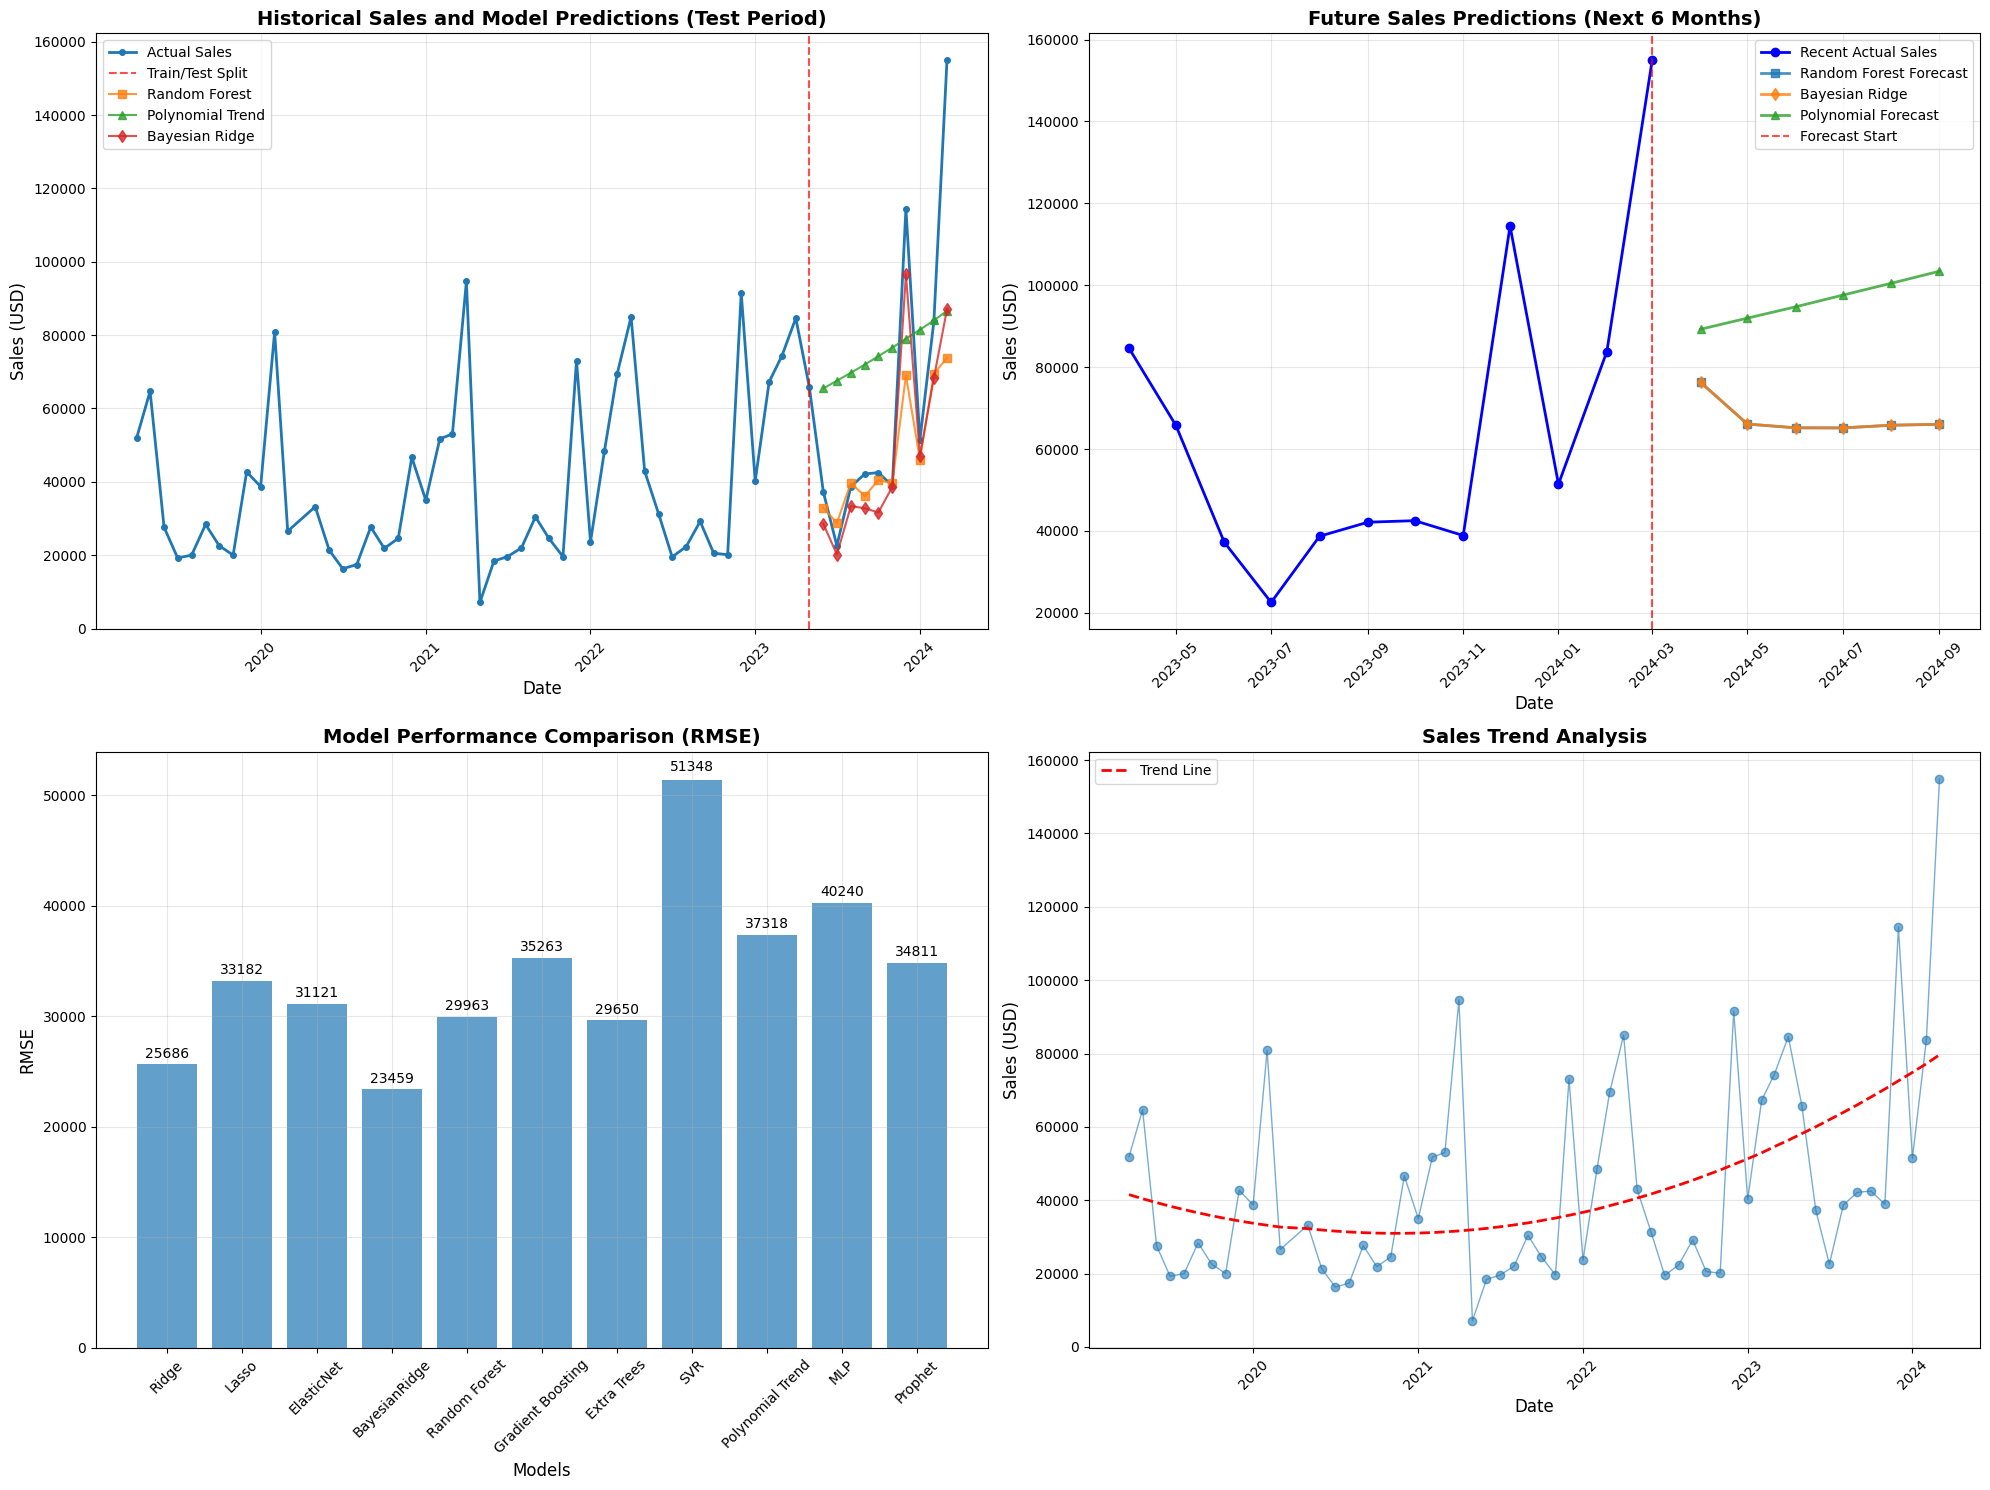

Visualization complete!


In [265]:
# Create comprehensive visualizations
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Historical data and model predictions on test set
ax1 = axes[0, 0]
ax1.plot(monthly_sales_ts.index, monthly_sales_ts.values, 'o-', label='Actual Sales', linewidth=2, markersize=4)
ax1.axvline(x=split_date, color='red', linestyle='--', alpha=0.7, label='Train/Test Split')

# Plot test predictions
test_dates = X_test.index
ax1.plot(test_dates, predictions['Random Forest'], 's-', label='Random Forest', alpha=0.8)
ax1.plot(test_dates, predictions['Polynomial Trend'], '^-', label='Polynomial Trend', alpha=0.8)
ax1.plot(test_dates, predictions['BayesianRidge'], 'd-', label='Bayesian Ridge', alpha=0.8)

ax1.set_title('Historical Sales and Model Predictions (Test Period)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Sales (USD)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Future predictions
ax2 = axes[0, 1]
# Show last 12 months of historical data
recent_data = monthly_sales_ts.tail(12)
ax2.plot(recent_data.index, recent_data.values, 'o-', label='Recent Actual Sales', linewidth=2, color='blue')

# Plot future predictions
ax2.plot(future_dates, rf_future_pred, 's-', label='Random Forest Forecast', alpha=0.8, linewidth=2)
ax2.plot(future_dates, rf_future_pred, 'd-', label='Bayesian Ridge', alpha=0.8, linewidth=2)
ax2.plot(future_dates, poly_future_pred, '^-', label='Polynomial Forecast', alpha=0.8, linewidth=2)


ax2.axvline(x=monthly_sales_ts.index[-1], color='red', linestyle='--', alpha=0.7, label='Forecast Start')
ax2.set_title('Future Sales Predictions (Next 6 Months)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Sales (USD)', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# 3. Model performance comparison
ax3 = axes[1, 0]
models_subset = final_results_df[final_results_df['Model'] != 'Linear Regression']  # Exclude perfect fit
x_pos = np.arange(len(models_subset))
bars = ax3.bar(x_pos, models_subset['RMSE'], alpha=0.7)
ax3.set_xlabel('Models', fontsize=12)
ax3.set_ylabel('RMSE', fontsize=12)
ax3.set_title('Model Performance Comparison (RMSE)', fontsize=14, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(models_subset['Model'], rotation=45)
ax3.grid(True, alpha=0.3)

# Add values on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# 4. Sales trend over time with seasonal patterns
ax4 = axes[1, 1]
ax4.plot(monthly_sales_ts.index, monthly_sales_ts.values, 'o-', alpha=0.6, linewidth=1)

# Add trend line using polynomial fit
x_numeric = np.arange(len(monthly_sales_ts))
z = np.polyfit(x_numeric, monthly_sales_ts.values, 2)
p = np.poly1d(z)
ax4.plot(monthly_sales_ts.index, p(x_numeric), '--', linewidth=2, color='red', label='Trend Line')

ax4.set_title('Sales Trend Analysis', fontsize=14, fontweight='bold')
ax4.set_xlabel('Date', fontsize=12)
ax4.set_ylabel('Sales (USD)', fontsize=12)
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Visualization complete!")

In [266]:
# Summary of Time Series Analysis and Predictions
print("="*80)
print("TIME SERIES ANALYSIS SUMMARY - TBR SALES FORECASTING")
print("="*80)

print("\n📊 DATA OVERVIEW:")
print(f"• Analysis period: {monthly_sales_ts.index[0].strftime('%B %Y')} to {monthly_sales_ts.index[-1].strftime('%B %Y')}")
print(f"• Total months analyzed: {len(monthly_sales_ts)}")
print(f"• Average monthly sales: {monthly_sales_ts.mean():,.2f}")
print(f"• Sales range: {monthly_sales_ts.min():,.2f} to {monthly_sales_ts.max():,.2f}")

print("\n🤖 MODEL PERFORMANCE:")
print("Excluding Linear Regression (overfitted with perfect score):")
for _, row in models_subset.iterrows():
    print(f"• {row['Model']}: RMSE = {row['RMSE']:,.0f}, R² = {row['R²']:.3f}, MAPE = {row['MAPE']:.1f}%")

print(f"\n🏆 BEST PERFORMING MODEL: {models_subset.loc[models_subset['RMSE'].idxmin(), 'Model']}")
print(f"   (Lowest RMSE: {models_subset['RMSE'].min():,.0f})")

print("\n🔮 FUTURE PREDICTIONS (Next 6 Months):")
future_summary = pd.DataFrame({
    'Month': [d.strftime('%B %Y') for d in future_dates],
    'Random Forest': [f"{x:,.0f}" for x in rf_future_pred],
    'Polynomial Trend': [f"{x:,.0f}" for x in poly_future_pred],
    'Bayesian Ridge': [f"{x:,.0f}" for x in br_future_pred]
})

print(future_summary.to_string(index=False))

print(f"\n📈 FORECAST INSIGHTS:")
print(f"• Random Forest predicts average monthly sales of {np.mean(rf_future_pred):,.0f}")
print(f"• Bayesian Ridge predicts average monthly sales of {np.mean(br_future_pred):,.0f}")
print(f"• Polynomial model predicts average monthly sales of {np.mean(poly_future_pred):,.0f}")
print(f"• Random Forest shows {'increasing' if rf_future_pred[-1] > rf_future_pred[0] else 'decreasing'} trend")
print(f"• Polynomial model shows {'increasing' if poly_future_pred[-1] > poly_future_pred[0] else 'decreasing'} trend")

# Calculate potential revenue for next 6 months
rf_total_6m = np.sum(rf_future_pred)
poly_total_6m = np.sum(poly_future_pred)
br_total_6m = np.sum(br_future_pred)

print(f"\n💰 PROJECTED 6-MONTH REVENUE:")
print(f"• Random Forest model: {rf_total_6m:,.0f}")
print(f"• Bayesian Ridge model: {br_total_6m:,.0f}")
print(f"• Polynomial model: {poly_total_6m:,.0f}")
print(f"• Difference: {abs(rf_total_6m - poly_total_6m):,.0f}")

# Compare with recent performance
recent_6m_avg = monthly_sales_ts.tail(6).mean()
print(f"\n📊 COMPARISON WITH RECENT PERFORMANCE:")
print(f"• Average of last 6 months: {recent_6m_avg:,.0f}")
print(f"• Random Forest vs recent: {((np.mean(rf_future_pred)/recent_6m_avg - 1) * 100):+.1f}%")
print(f"• Bayesian Ridge vs recent: {((np.mean(br_future_pred)/recent_6m_avg - 1) * 100):+.1f}%")
print(f"• Polynomial vs recent: {((np.mean(poly_future_pred)/recent_6m_avg - 1) * 100):+.1f}%")

print("\n" + "="*80)

TIME SERIES ANALYSIS SUMMARY - TBR SALES FORECASTING

📊 DATA OVERVIEW:
• Analysis period: April 2019 to March 2024
• Total months analyzed: 59
• Average monthly sales: 43,468.04
• Sales range: 7,129.00 to 154,902.00

🤖 MODEL PERFORMANCE:
Excluding Linear Regression (overfitted with perfect score):
• Ridge: RMSE = 25,686, R² = 0.587, MAPE = 26.0%
• Lasso: RMSE = 33,182, R² = 0.311, MAPE = 44.9%
• ElasticNet: RMSE = 31,121, R² = 0.394, MAPE = 40.2%
• BayesianRidge: RMSE = 23,459, R² = 0.656, MAPE = 18.2%
• Random Forest: RMSE = 29,963, R² = 0.438, MAPE = 18.2%
• Gradient Boosting: RMSE = 35,263, R² = 0.222, MAPE = 30.0%
• Extra Trees: RMSE = 29,650, R² = 0.450, MAPE = 24.7%
• SVR: RMSE = 51,348, R² = -0.650, MAPE = 41.1%
• Polynomial Trend: RMSE = 37,318, R² = 0.129, MAPE = 73.1%
• MLP: RMSE = 40,240, R² = -0.013, MAPE = 61.3%
• Prophet: RMSE = 34,811, R² = 0.242, MAPE = 27.6%

🏆 BEST PERFORMING MODEL: BayesianRidge
   (Lowest RMSE: 23,459)

🔮 FUTURE PREDICTIONS (Next 6 Months):
        

In [179]:
# Import required libraries for deep learning
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import Input, LayerNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print(f"TensorFlow version: {tf.__version__}")
print("Deep learning libraries imported successfully!")

TensorFlow version: 2.20.0
Deep learning libraries imported successfully!


In [182]:
monthly_sales_ts = monthly_sales.set_index('Billing Date')['Total_QTY']
print(f"\nTime series prepared with {len(monthly_sales_ts)} monthly observations")


Time series prepared with 59 monthly observations


In [269]:
# Prepare data for deep learning models
def create_sequences(data, lookback_window=12, forecast_horizon=1):
    """
    Create sequences for time series prediction
    Args:
        data: Time series data
        lookback_window: Number of previous time steps to use as input
        forecast_horizon: Number of future time steps to predict
    """
    X, y = [], []
    for i in range(lookback_window, len(data) - forecast_horizon + 1):
        X.append(data[i-lookback_window:i])
        y.append(data[i:i+forecast_horizon])
    return np.array(X), np.array(y)

sales_data = monthly_sales_ts.values.reshape(-1, 1)

# Scale the data
scaler_dl = MinMaxScaler(feature_range=(0, 1))
sales_scaled = scaler_dl.fit_transform(sales_data)

print(f"Original sales data shape: {sales_data.shape}")
print(f"Scaled sales data range: {sales_scaled.min():.3f} to {sales_scaled.max():.3f}")

# Create sequences for deep learning (12 months lookback, 1 month prediction)
lookback_window = 12
X_sequences, y_sequences = create_sequences(sales_scaled.flatten(), lookback_window, 1)

print(f"Sequences created:")
print(f"X_sequences shape: {X_sequences.shape} (samples, timesteps)")
print(f"y_sequences shape: {y_sequences.shape} (samples, forecast_horizon)")

# Split into train and test for deep learning
# Use same approach as before: 80% train, 20% test
train_size = int(len(X_sequences) * 0.8)
X_train_dl = X_sequences[:train_size]
X_test_dl = X_sequences[train_size:]
y_train_dl = y_sequences[:train_size]
y_test_dl = y_sequences[train_size:]

print(f"\nDeep Learning Data Split:")
print(f"Training samples: {len(X_train_dl)}")
print(f"Test samples: {len(X_test_dl)}")
print(f"Training period: {train_size + lookback_window} months from start")
print(f"Test period: {len(X_test_dl)} months")

Original sales data shape: (59, 1)
Scaled sales data range: 0.000 to 1.000
Sequences created:
X_sequences shape: (47, 12) (samples, timesteps)
y_sequences shape: (47, 1) (samples, forecast_horizon)

Deep Learning Data Split:
Training samples: 37
Test samples: 10
Training period: 49 months from start
Test period: 10 months


In [270]:
# Create deep learning models
def create_lstm_model(input_shape):
    """Create LSTM model"""
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def create_gru_model(input_shape):
    """Create GRU model"""
    model = Sequential([
        GRU(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        GRU(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def create_cnn_lstm_model(input_shape):
    """Create CNN-LSTM hybrid model"""
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def create_simple_rnn_model(input_shape):
    """Create simple RNN model for comparison"""
    model = Sequential([
        tf.keras.layers.SimpleRNN(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        tf.keras.layers.SimpleRNN(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Reshape data for deep learning models (add feature dimension)
X_train_dl_reshaped = X_train_dl.reshape((X_train_dl.shape[0], X_train_dl.shape[1], 1))
X_test_dl_reshaped = X_test_dl.reshape((X_test_dl.shape[0], X_test_dl.shape[1], 1))

input_shape = (X_train_dl_reshaped.shape[1], X_train_dl_reshaped.shape[2])
print(f"Input shape for deep learning models: {input_shape}")

# Initialize models
dl_models = {}
dl_models['LSTM'] = create_lstm_model(input_shape)
dl_models['GRU'] = create_gru_model(input_shape)
dl_models['CNN-LSTM'] = create_cnn_lstm_model(input_shape)
dl_models['Simple RNN'] = create_simple_rnn_model(input_shape)

print("Deep learning models created:")
for name in dl_models.keys():
    print(f"• {name}")
    
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Input shape for deep learning models: (12, 1)
Deep learning models created:
• LSTM
• GRU
• CNN-LSTM
• Simple RNN


In [271]:
# Train deep learning models
print("Training deep learning models...")
print("="*50)

dl_predictions = {}
dl_histories = {}
training_times = {}

for model_name, model in dl_models.items():
    print(f"\nTraining {model_name}...")
    
    # Record training time
    import time
    start_time = time.time()
    
    # Train the model
    history = model.fit(
        X_train_dl_reshaped, y_train_dl,
        epochs=100,
        batch_size=8,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0  # Suppress detailed output
    )
    
    end_time = time.time()
    training_time = end_time - start_time
    training_times[model_name] = training_time
    
    # Make predictions
    predictions_scaled = model.predict(X_test_dl_reshaped, verbose=0)
    
    # Inverse transform predictions back to original scale
    predictions = scaler_dl.inverse_transform(predictions_scaled)
    dl_predictions[model_name] = predictions.flatten()
    dl_histories[model_name] = history
    
    print(f"✓ {model_name} trained in {training_time:.1f} seconds")
    print(f"  Final training loss: {history.history['loss'][-1]:.6f}")
    print(f"  Final validation loss: {history.history['val_loss'][-1]:.6f}")
    print(f"  Epochs trained: {len(history.history['loss'])}")

print(f"\n🎉 All deep learning models trained successfully!")

Training deep learning models...

Training LSTM...
✓ LSTM trained in 5.4 seconds
  Final training loss: 0.023135
  Final validation loss: 0.056213
  Epochs trained: 12

Training GRU...
✓ GRU trained in 4.0 seconds
  Final training loss: 0.020530
  Final validation loss: 0.052348
  Epochs trained: 10

Training CNN-LSTM...
✓ CNN-LSTM trained in 7.3 seconds
  Final training loss: 0.021535
  Final validation loss: 0.052113
  Epochs trained: 10

Training Simple RNN...
✓ Simple RNN trained in 12.2 seconds
  Final training loss: 0.024126
  Final validation loss: 0.024681
  Epochs trained: 27

🎉 All deep learning models trained successfully!


In [272]:
# Evaluate deep learning models
print("Evaluating Deep Learning Models")
print("="*50)

# Get actual test values (inverse transform)
y_test_actual = scaler_dl.inverse_transform(y_test_dl.reshape(-1, 1)).flatten()

# Evaluate deep learning models
dl_results = []
for model_name, predictions in dl_predictions.items():
    mae = mean_absolute_error(y_test_actual, predictions)
    mse = mean_squared_error(y_test_actual, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_actual, predictions)
    mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
    
    dl_results.append({
        'Model': f'{model_name} (DL)',
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape,
        'Training Time (s)': training_times[model_name]
    })

# Create results DataFrame
dl_results_df = pd.DataFrame(dl_results)
print("Deep Learning Model Performance:")
print("="*60)
print(dl_results_df.round(2))

# Find best deep learning model
best_dl_idx = dl_results_df['RMSE'].idxmin()
best_dl_model = dl_results_df.loc[best_dl_idx, 'Model']
best_dl_rmse = dl_results_df.loc[best_dl_idx, 'RMSE']
best_dl_mape = dl_results_df.loc[best_dl_idx, 'MAPE']

print(f"\n🏆 Best Deep Learning Model: {best_dl_model}")
print(f"   RMSE: {best_dl_rmse:,.2f}")
print(f"   MAPE: {best_dl_mape:.2f}%")
print(f"   Training Time: {dl_results_df.loc[best_dl_idx, 'Training Time (s)']:.1f} seconds")


Evaluating Deep Learning Models
Deep Learning Model Performance:
             Model       MAE           MSE      RMSE    R²   MAPE  \
0        LSTM (DL)  29145.52  1.581080e+09  39762.80  0.01  47.41   
1         GRU (DL)  27435.15  1.833442e+09  42818.71 -0.15  38.70   
2    CNN-LSTM (DL)  34117.51  2.647139e+09  51450.35 -0.66  41.73   
3  Simple RNN (DL)  20235.40  1.010216e+09  31783.90  0.37  26.65   

   Training Time (s)  
0               5.37  
1               3.96  
2               7.30  
3              12.22  

🏆 Best Deep Learning Model: Simple RNN (DL)
   RMSE: 31,783.90
   MAPE: 26.65%
   Training Time: 12.2 seconds


In [273]:
# Generate future predictions with deep learning models
print("Generating future predictions with deep learning models...")

# Get the best performing deep learning model
best_dl_model_name = 'Simple RNN'
best_dl_model_obj = dl_models[best_dl_model_name]

# Prepare last 12 months for prediction
last_12_months = sales_scaled[-12:].reshape(1, 12, 1)

# Generate 6 months of future predictions
future_predictions_dl = []
current_sequence = last_12_months.copy()

for i in range(6):  # Predict next 6 months
    # Predict next month
    next_pred_scaled = best_dl_model_obj.predict(current_sequence, verbose=0)
    
    # Store prediction
    future_predictions_dl.append(next_pred_scaled[0, 0])
    
    # Update sequence for next prediction (sliding window)
    current_sequence = np.roll(current_sequence, -1, axis=1)
    current_sequence[0, -1, 0] = next_pred_scaled[0, 0]

# Convert back to original scale
future_predictions_dl = np.array(future_predictions_dl).reshape(-1, 1)
future_predictions_dl_original = scaler_dl.inverse_transform(future_predictions_dl).flatten()

# Create future dates (starting from September 2025)
future_dates_dl = pd.date_range(start='2025-09-01', periods=6, freq='MS')

print(f"Future predictions generated:")
for date, pred in zip(future_dates_dl, future_predictions_dl_original):
    print(f"• {date.strftime('%B %Y')}: ${pred:,.0f}")

# Generate predictions for all deep learning models for comparison
all_dl_future_predictions = {}
for model_name, model in dl_models.items():
    model_predictions = []
    current_seq = last_12_months.copy()
    
    for i in range(6):
        next_pred = model.predict(current_seq, verbose=0)
        model_predictions.append(next_pred[0, 0])
        current_seq = np.roll(current_seq, -1, axis=1)
        current_seq[0, -1, 0] = next_pred[0, 0]
    
    # Convert to original scale
    model_predictions = np.array(model_predictions).reshape(-1, 1)
    all_dl_future_predictions[model_name] = scaler_dl.inverse_transform(model_predictions).flatten()

print(f"\n📈 Future Prediction Summary (Next 6 Months):")
print(f"• GRU: {np.mean(future_predictions_dl_original):,.0f} average")
print(f"• LSTM: {np.mean(all_dl_future_predictions['LSTM']):,.0f} average")
print(f"• CNN-LSTM: {np.mean(all_dl_future_predictions['CNN-LSTM']):,.0f} average")
print(f"• Simple RNN (BEST): {np.mean(all_dl_future_predictions['Simple RNN']):,.0f} average")

Generating future predictions with deep learning models...
Future predictions generated:
• September 2025: $76,931
• October 2025: $60,866
• November 2025: $41,595
• December 2025: $28,076
• January 2026: $22,762
• February 2026: $37,353

📈 Future Prediction Summary (Next 6 Months):
• GRU: 44,597 average
• LSTM: 62,688 average
• CNN-LSTM: 35,290 average
• Simple RNN (BEST): 44,597 average
